In [ ]:
# Data Modeling

In [1]:
import pandas as pd
import os
import glob

file_path = os.path.join(os.getcwd(), '/Users/apple/Documents/APD/','nursing_clean.csv')
nursing_df = pd.read_csv(file_path, encoding='utf-8',low_memory=False)

pd.set_option('display.max_columns', None)
nursing_df.head(1)

,provider_ccn,year,provnum,provname,address,city,state,zip,phone,county_ssa,county_name,ownership,bedcert,restot,overall_rating,tot_penlty_cnt,rnhrd,totlichrd,tothrd,pthrd,inhosp,rural_versus_urban,gross_revenue,net_income,net_patient_revenue,number_of_beds,total_income,total_salaries_adjusted,fiscal_year_begin_date,fiscal_year_end_date,less_total_operating_expense,net_income_from_patients,overhead_non_salary_costs,wage_related_costs_core,less_discounts_on_patients,snf_admissions_total,total_days_total,total_bed_days_available,other_revenue,total_costs,HD,sum_of_hd_code,count_of_hd_code,fiscal_period_days,gross_revenue_annualized,net_income_annualized,net_patient_revenue_annualized,total_costs_annualized,total_salaries_adjusted_annualized,total_income_annualized,less_total_operating_expense_annualized,net_income_from_patients_annualized,other_revenue_annualized,snf_admissions_total_annualized,total_bed_days_available_annualized,total_days_total_annualized
0,15009,2015,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2.563324e+09,290.0,Franklin,For profit - Corporation,57.0,52.0,4.0,0.0,0.725,1.69712,4.17404,0.01058,NO,R,4244059.0,-227296.0,4244059.0,57.0,-227296.0,2589028.0,2015-07-01,2016-06-30,4605452.0,-361393.0,2016424.0,456111.0,NaN,156.0,18187.0,20805.0,0.0,4605452.0,345083,NaN,NaN,365.0,4244059.0,-227296.0,4244059.0,4605452.0,2589028.0,-227296.0,4605452.0,-361393.0,0.0,156.0,20805.0,18187.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class NursingHomeEDA:
    def __init__(self, df):
        """
        Initialize the EDA class with nursing home panel data
        
        Parameters:
        df (DataFrame): Panel data with nursing homes from 2015-2021
        """
        self.df = df.copy()
        self.financial_cols = [
            'gross_revenue_annualized', 'net_income_annualized',
            'net_patient_revenue_annualized', 'total_costs_annualized',
            'total_salaries_adjusted_annualized', 'total_income_annualized',
            'less_total_operating_expense_annualized',
            'net_income_from_patients_annualized', 'other_revenue_annualized'
        ]
        self.operational_cols = [
            'snf_admissions_total_annualized', 'total_bed_days_available_annualized',
            'total_days_total_annualized'
        ]
        self.key_cols = [
            'ownership', 'overall_rating', 'tot_penlty_cnt', 
            'rural_versus_urban', 'sum_of_hd_code'
        ]
        
    def basic_info(self):
        """Display basic information about the dataset"""
        print("=" * 60)
        print("NURSING HOME PANEL DATA - BASIC INFORMATION")
        print("=" * 60)
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Time Period: 2015-2021")
        print(f"Memory Usage: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Data types
        print("\nData Types Summary:")
        dtype_summary = self.df.dtypes.value_counts()
        for dtype, count in dtype_summary.items():
            print(f"  {dtype}: {count} columns")
        
        # Missing values overview
        print(f"\nMissing Values: {self.df.isnull().sum().sum():,} total")
        print(f"Columns with Missing Values: {(self.df.isnull().sum() > 0).sum()}")
        
        return self.df.info()
    
    def panel_structure_analysis(self):
        """Analyze the panel data structure"""
        print("\n" + "=" * 60)
        print("PANEL DATA STRUCTURE ANALYSIS")
        print("=" * 60)
        
        # Assuming there's an identifier column for nursing homes
        # You may need to adjust this based on your actual ID column name
        id_cols = ['provider_ccn', 'provnum']
        id_col = None
        for col in id_cols:
            if col in self.df.columns:
                id_col = col
                break
        
        if id_col:
            # Panel balance analysis
            facility_counts = self.df[id_col].value_counts()
            print(f"Unique Nursing Homes: {self.df[id_col].nunique():,}")
            print(f"Total Observations: {len(self.df):,}")
            print(f"Average Records per Facility: {len(self.df) / self.df[id_col].nunique():.2f}")
            
            print("\nPanel Balance:")
            balance_summary = facility_counts.value_counts().sort_index()
            for years, count in balance_summary.items():
                print(f"  {count:,} facilities with {years} year(s) of data")
            
            # Visualize panel structure
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Distribution of records per facility
            ax1.hist(facility_counts, bins=range(1, 8), alpha=0.7, edgecolor='black')
            ax1.set_xlabel('Number of Years per Facility')
            ax1.set_ylabel('Number of Facilities')
            ax1.set_title('Distribution of Panel Length')
            ax1.set_xticks(range(1, 7))
            
            # Year coverage
            if 'year' in self.df.columns:
                year_counts = self.df['year'].value_counts().sort_index()
                ax2.bar(year_counts.index, year_counts.values, alpha=0.7)
                ax2.set_xlabel('Year')
                ax2.set_ylabel('Number of Facilities')
                ax2.set_title('Facility Count by Year')
                ax2.tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
            
        else:
            print("No facility ID column found. Please specify the correct identifier column.")
    
    def missing_data_analysis(self):
        """Comprehensive missing data analysis"""
        print("\n" + "=" * 60)
        print("MISSING DATA ANALYSIS")
        print("=" * 60)
        
        missing_summary = self.df.isnull().sum()
        missing_pct = (missing_summary / len(self.df)) * 100
        
        missing_df = pd.DataFrame({
            'Missing_Count': missing_summary,
            'Missing_Percentage': missing_pct
        }).sort_values('Missing_Percentage', ascending=False)
        
        # Show top 20 columns with missing data
        print("Top 20 Columns with Missing Data:")
        print(missing_df[missing_df['Missing_Count'] > 0].head(20))
        
        # Visualize missing data patterns
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        
        # Missing data heatmap for key columns
        key_missing = missing_df[missing_df.index.isin(self.key_cols + self.financial_cols[:5])]
        if not key_missing.empty:
            sns.heatmap(self.df[key_missing.index].isnull().T, 
                       cbar=True, ax=ax1, cmap='viridis')
            ax1.set_title('Missing Data Pattern - Key Columns')
            ax1.set_xlabel('Observations')
        
        # Missing data percentage bar plot
        top_missing = missing_df[missing_df['Missing_Count'] > 0].head(15)
        if not top_missing.empty:
            ax2.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
            ax2.set_yticks(range(len(top_missing)))
            ax2.set_yticklabels(top_missing.index)
            ax2.set_xlabel('Missing Percentage (%)')
            ax2.set_title('Top 15 Columns by Missing Data Percentage')
        
        plt.tight_layout()
        plt.show()
        
        return missing_df
    
    def categorical_analysis(self):
        """Analyze categorical variables"""
        print("\n" + "=" * 60)
        print("CATEGORICAL VARIABLES ANALYSIS")
        print("=" * 60)
        
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        plot_idx = 0
        for col in ['ownership', 'overall_rating', 'rural_versus_urban'][:3]:
            if col in self.df.columns and plot_idx < 4:
                # Value counts
                value_counts = self.df[col].value_counts()
                print(f"\n{col.upper()}:")
                print(value_counts)
                
                # Plot
                if len(value_counts) <= 10:  # Bar plot for few categories
                    value_counts.plot(kind='bar', ax=axes[plot_idx], alpha=0.8)
                    axes[plot_idx].set_title(f'Distribution of {col}')
                    axes[plot_idx].tick_params(axis='x', rotation=45)
                else:  # Horizontal bar for many categories
                    value_counts.head(10).plot(kind='barh', ax=axes[plot_idx], alpha=0.8)
                    axes[plot_idx].set_title(f'Top 10 Categories - {col}')
                
                plot_idx += 1
        
        # Remove unused subplots
        for i in range(plot_idx, 4):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    def numerical_analysis(self):
        """Comprehensive numerical variables analysis"""
        print("\n" + "=" * 60)
        print("NUMERICAL VARIABLES ANALYSIS")
        print("=" * 60)
        
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        
        # Basic statistics
        print("FINANCIAL METRICS SUMMARY:")
        if any(col in self.df.columns for col in self.financial_cols):
            available_financial = [col for col in self.financial_cols if col in self.df.columns]
            print(self.df[available_financial].describe())
        
        print("\nOPERATIONAL METRICS SUMMARY:")
        if any(col in self.df.columns for col in self.operational_cols):
            available_operational = [col for col in self.operational_cols if col in self.df.columns]
            print(self.df[available_operational].describe())
        
        # Distribution plots
        financial_available = [col for col in self.financial_cols if col in self.df.columns][:6]
        if financial_available:
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))
            axes = axes.ravel()
            
            for i, col in enumerate(financial_available):
                if i < 6:
                    # Remove outliers for better visualization
                    data = self.df[col].dropna()
                    Q1, Q3 = data.quantile([0.25, 0.75])
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
                    
                    axes[i].hist(filtered_data, bins=50, alpha=0.7, edgecolor='black')
                    axes[i].set_title(f'{col}\n(Outliers Removed)')
                    axes[i].set_xlabel('Value')
                    axes[i].set_ylabel('Frequency')
            
            plt.tight_layout()
            plt.show()
    
    def correlation_analysis(self):
        """Analyze correlations between variables"""
        print("\n" + "=" * 60)
        print("CORRELATION ANALYSIS")
        print("=" * 60)
        
        # 1. Financial-to-Financial correlations
        available_financial = [col for col in self.financial_cols if col in self.df.columns]
        if len(available_financial) > 1:
            financial_corr = self.df[available_financial].corr()
            
            plt.figure(figsize=(12, 10))
            mask = np.triu(np.ones_like(financial_corr, dtype=bool))
            sns.heatmap(financial_corr, mask=mask, annot=True, cmap='coolwarm', 
                       center=0, square=True, fmt='.2f')
            plt.title('Financial Metrics Correlation Matrix')
            plt.tight_layout()
            plt.show()
            
            # Print high correlations
            print("High Financial Correlations (|r| > 0.7):")
            high_corr = []
            for i in range(len(financial_corr.columns)):
                for j in range(i+1, len(financial_corr.columns)):
                    corr_val = financial_corr.iloc[i, j]
                    if abs(corr_val) > 0.7:
                        high_corr.append((financial_corr.columns[i], 
                                        financial_corr.columns[j], corr_val))
            
            for var1, var2, corr in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
                print(f"  {var1} vs {var2}: {corr:.3f}")
        
        # 2. Financial vs Categorical Analysis
        self.financial_categorical_analysis()
    
    def financial_categorical_analysis(self):
        """Analyze relationships between financial metrics and categorical variables"""
        print("\n" + "-" * 50)
        print("FINANCIAL vs CATEGORICAL ANALYSIS")
        print("-" * 50)
        
        available_financial = [col for col in self.financial_cols if col in self.df.columns][:4]
        categorical_vars = ['overall_rating', 'ownership', 'rural_versus_urban']
        
        # Statistical tests and effect sizes
        for cat_var in categorical_vars:
            if cat_var in self.df.columns:
                print(f"\n{cat_var.upper()} vs FINANCIAL METRICS:")
                print("-" * 40)
                
                for fin_var in available_financial:
                    if fin_var in self.df.columns:
                        # Remove missing values
                        clean_data = self.df[[cat_var, fin_var]].dropna()
                        
                        if len(clean_data) > 0:
                            # ANOVA for multiple groups or t-test for two groups
                            groups = [group[fin_var].values for name, group in clean_data.groupby(cat_var)]
                            groups = [g for g in groups if len(g) > 0]  # Remove empty groups
                            
                            if len(groups) >= 2:
                                try:
                                    if len(groups) == 2:
                                        stat, p_value = stats.ttest_ind(groups[0], groups[1])
                                        test_name = "T-test"
                                    else:
                                        stat, p_value = stats.f_oneway(*groups)
                                        test_name = "ANOVA"
                                    
                                    # Effect size (eta-squared for ANOVA, Cohen's d for t-test)
                                    if len(groups) == 2:
                                        pooled_std = np.sqrt(((len(groups[0])-1)*np.var(groups[0], ddof=1) + 
                                                            (len(groups[1])-1)*np.var(groups[1], ddof=1)) / 
                                                           (len(groups[0])+len(groups[1])-2))
                                        cohens_d = (np.mean(groups[0]) - np.mean(groups[1])) / pooled_std
                                        effect_size = abs(cohens_d)
                                        effect_name = "Cohen's d"
                                    else:
                                        # Eta-squared
                                        ss_between = sum([len(g) * (np.mean(g) - np.mean(clean_data[fin_var]))**2 for g in groups])
                                        ss_total = np.sum((clean_data[fin_var] - np.mean(clean_data[fin_var]))**2)
                                        eta_squared = ss_between / ss_total if ss_total > 0 else 0
                                        effect_size = eta_squared
                                        effect_name = "Eta-squared"
                                    
                                    # Interpret significance and effect size
                                    sig_level = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
                                    
                                    print(f"  {fin_var}:")
                                    print(f"    {test_name}: p-value = {p_value:.4f} {sig_level}")
                                    print(f"    {effect_name}: {effect_size:.4f}")
                                    
                                    # Group means
                                    group_means = clean_data.groupby(cat_var)[fin_var].mean()
                                    print(f"    Group Means: {dict(group_means)}")
                                    
                                except Exception as e:
                                    print(f"  {fin_var}: Statistical test failed - {str(e)}")
        
        # Visualizations
        self.plot_financial_categorical_relationships()
    
    def plot_financial_categorical_relationships(self):
        """Create visualizations for financial-categorical relationships"""
        available_financial = [col for col in self.financial_cols if col in self.df.columns][:3]
        categorical_vars = ['overall_rating', 'ownership', 'rural_versus_urban']
        
        # Quality Rating vs Financial Performance
        if 'overall_rating' in self.df.columns and available_financial:
            fig, axes = plt.subplots(1, len(available_financial), figsize=(15, 5))
            if len(available_financial) == 1:
                axes = [axes]
            
            for i, fin_var in enumerate(available_financial):
                # Box plot
                self.df.boxplot(column=fin_var, by='overall_rating', ax=axes[i])
                axes[i].set_title(f'{fin_var} by Overall Rating')
                axes[i].set_xlabel('Overall Rating')
                axes[i].tick_params(axis='x', rotation=45)
            
            plt.suptitle('')  # Remove default title
            plt.tight_layout()
            plt.show()
        
        # Ownership vs Financial Performance
        if 'ownership' in self.df.columns and available_financial:
            fig, axes = plt.subplots(1, len(available_financial), figsize=(15, 5))
            if len(available_financial) == 1:
                axes = [axes]
            
            for i, fin_var in enumerate(available_financial):
                self.df.boxplot(column=fin_var, by='ownership', ax=axes[i])
                axes[i].set_title(f'{fin_var} by Ownership Type')
                axes[i].set_xlabel('Ownership Type')
                axes[i].tick_params(axis='x', rotation=45)
            
            plt.suptitle('')
            plt.tight_layout()
            plt.show()
        
        # Rural vs Urban
        if 'rural_versus_urban' in self.df.columns and available_financial:
            fig, axes = plt.subplots(1, len(available_financial), figsize=(15, 5))
            if len(available_financial) == 1:
                axes = [axes]
            
            for i, fin_var in enumerate(available_financial):
                self.df.boxplot(column=fin_var, by='rural_versus_urban', ax=axes[i])
                axes[i].set_title(f'{fin_var} by Rural vs Urban')
                axes[i].set_xlabel('Rural vs Urban')
                axes[i].tick_params(axis='x', rotation=45)
            
            plt.suptitle('')
            plt.tight_layout()
            plt.show()
    
    def temporal_analysis(self):
        """Analyze temporal trends"""
        print("\n" + "=" * 60)
        print("TEMPORAL TRENDS ANALYSIS")
        print("=" * 60)
        
        if 'year' not in self.df.columns:
            print("No 'year' column found. Skipping temporal analysis.")
            return
        
        # Key metrics over time
        metrics_to_plot = []
        for col in ['overall_rating', 'tot_penlty_cnt'] + self.financial_cols[:3]:
            if col in self.df.columns:
                metrics_to_plot.append(col)
        
        if metrics_to_plot:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.ravel()
            
            for i, col in enumerate(metrics_to_plot[:4]):
                yearly_stats = self.df.groupby('year')[col].agg(['mean', 'median']).reset_index()
                
                axes[i].plot(yearly_stats['year'], yearly_stats['mean'], 
                           marker='o', label='Mean', linewidth=2)
                axes[i].plot(yearly_stats['year'], yearly_stats['median'], 
                           marker='s', label='Median', linewidth=2)
                axes[i].set_title(f'{col} Over Time')
                axes[i].set_xlabel('Year')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
    
    def outlier_analysis(self):
        """Identify and analyze outliers"""
        print("\n" + "=" * 60)
        print("OUTLIER ANALYSIS")
        print("=" * 60)
        
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        outlier_summary = {}
        
        for col in numerical_cols:
            if col in self.financial_cols + self.operational_cols:
                data = self.df[col].dropna()
                if len(data) > 0:
                    Q1, Q3 = data.quantile([0.25, 0.75])
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    
                    outliers = data[(data < lower_bound) | (data > upper_bound)]
                    outlier_summary[col] = {
                        'count': len(outliers),
                        'percentage': (len(outliers) / len(data)) * 100,
                        'lower_bound': lower_bound,
                        'upper_bound': upper_bound
                    }
        
        # Display outlier summary
        outlier_df = pd.DataFrame(outlier_summary).T
        outlier_df = outlier_df.sort_values('percentage', ascending=False)
        print("Outlier Summary (Top 10):")
        print(outlier_df.head(10))
        
        # Box plots for key variables
        key_vars = [col for col in self.financial_cols[:4] if col in self.df.columns]
        if key_vars:
            fig, axes = plt.subplots(2, 2, figsize=(16, 10))
            axes = axes.ravel()
            
            for i, col in enumerate(key_vars):
                self.df.boxplot(column=col, ax=axes[i])
                axes[i].set_title(f'Box Plot - {col}')
                axes[i].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
    
    def ownership_analysis(self):
        """Detailed analysis by ownership type"""
        print("\n" + "=" * 60)
        print("OWNERSHIP TYPE ANALYSIS")
        print("=" * 60)
        
        if 'ownership' not in self.df.columns:
            print("No 'ownership' column found.")
            return
        
        # Financial performance by ownership
        financial_available = [col for col in self.financial_cols if col in self.df.columns][:4]
        if financial_available:
            ownership_stats = self.df.groupby('ownership')[financial_available].agg(['mean', 'median'])
            print("Financial Performance by Ownership Type:")
            print(ownership_stats)
            
            # Visualization
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.ravel()
            
            for i, col in enumerate(financial_available):
                self.df.boxplot(column=col, by='ownership', ax=axes[i])
                axes[i].set_title(f'{col} by Ownership Type')
                axes[i].tick_params(axis='x', rotation=45)
            
            plt.suptitle('')  # Remove default title
            plt.tight_layout()
            plt.show()
    
    def quality_analysis(self):
        """Analyze quality ratings and penalties"""
        print("\n" + "=" * 60)
        print("QUALITY ANALYSIS")
        print("=" * 60)
        
        # Overall rating analysis
        if 'overall_rating' in self.df.columns:
            rating_counts = self.df['overall_rating'].value_counts().sort_index()
            print("Overall Rating Distribution:")
            print(rating_counts)
            
            # Penalties analysis
            if 'tot_penlty_cnt' in self.df.columns:
                # Rating vs Penalties
                rating_penalty = self.df.groupby('overall_rating')['tot_penlty_cnt'].agg(['mean', 'median', 'count'])
                print("\nPenalties by Overall Rating:")
                print(rating_penalty)
                
                # Visualization
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
                
                # Rating distribution
                rating_counts.plot(kind='bar', ax=ax1, alpha=0.8)
                ax1.set_title('Distribution of Overall Ratings')
                ax1.set_xlabel('Overall Rating')
                ax1.set_ylabel('Count')
                
                # Rating vs Average Penalties
                rating_penalty['mean'].plot(kind='bar', ax=ax2, alpha=0.8, color='red')
                ax2.set_title('Average Penalties by Rating')
                ax2.set_xlabel('Overall Rating')
                ax2.set_ylabel('Average Penalty Count')
                
                plt.tight_layout()
                plt.show()
    
    def run_comprehensive_eda(self):
        """Run the complete EDA pipeline"""
        print("Starting Comprehensive EDA for Nursing Home Panel Data...")
        
        # Run all analyses
        self.basic_info()
        self.panel_structure_analysis()
        self.missing_data_analysis()
        self.categorical_analysis()
        self.numerical_analysis()
        self.correlation_analysis()
        self.temporal_analysis()
        self.outlier_analysis()
        self.ownership_analysis()
        self.quality_analysis()
        
        print("\n" + "=" * 60)
        print("EDA COMPLETE")
        print("=" * 60)
        print("Summary of key findings:")
        print("1. Panel structure and balance")
        print("2. Missing data patterns")
        print("3. Distribution of categorical variables")
        print("4. Financial and operational metrics distributions")
        print("5. Correlation patterns")
        print("6. Temporal trends (2015-2021)")
        print("7. Outlier identification")
        print("8. Performance by ownership type")
        print("9. Quality ratings and penalties relationship")



Starting Comprehensive EDA for Nursing Home Panel Data...
NURSING HOME PANEL DATA - BASIC INFORMATION
Dataset Shape: (99350, 56)
Time Period: 2015-2021
Memory Usage: 96.54 MB

Data Types Summary:
  float64: 42 columns
  object: 11 columns
  int64: 3 columns

Missing Values: 107,378 total
Columns with Missing Values: 39
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99350 entries, 0 to 99349
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   provider_ccn                             99350 non-null  int64  
 1   year                                     99350 non-null  int64  
 2   provnum                                  99350 non-null  int64  
 3   provname                                 99350 non-null  object 
 4   address                                  99350 non-null  object 
 5   city                                     99350 non-null  object 
 6   state

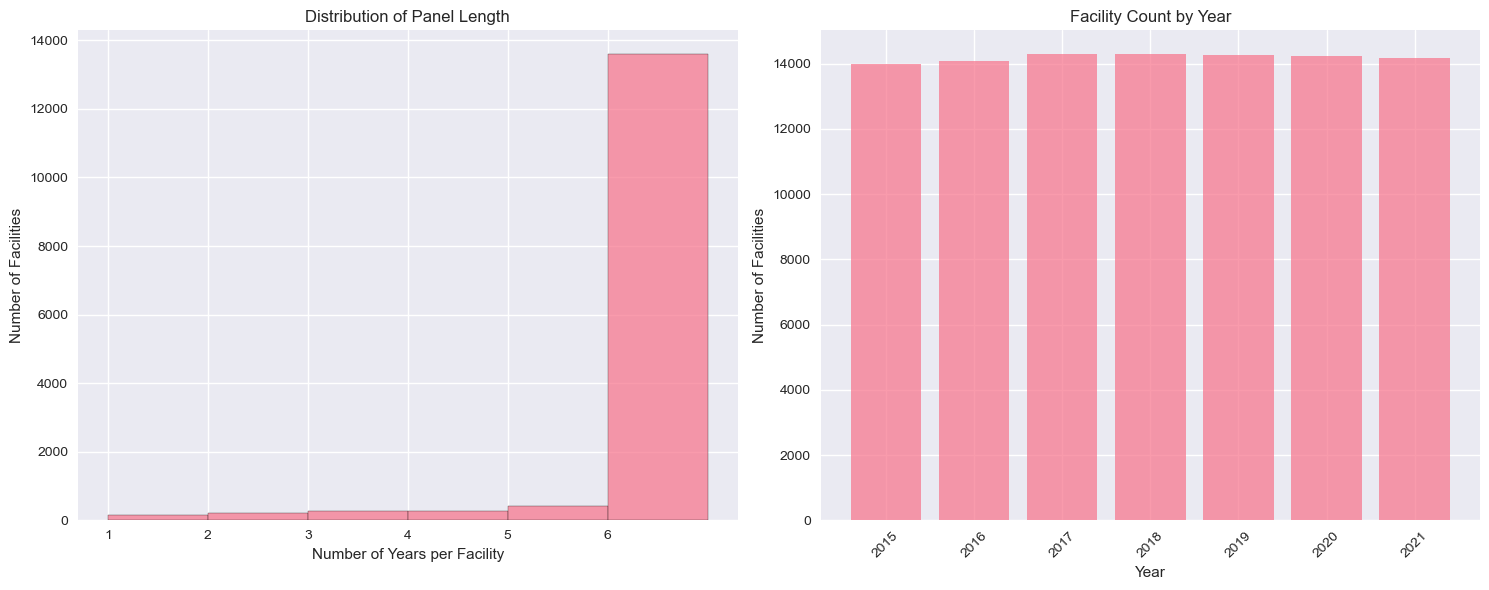


MISSING DATA ANALYSIS
Top 20 Columns with Missing Data:
                                     Missing_Count  Missing_Percentage
snf_admissions_total_annualized              28393           28.578762
snf_admissions_total                         28393           28.578762
count_of_hd_code                             12627           12.709612
sum_of_hd_code                               12627           12.709612
less_discounts_on_patients                    6522            6.564670
pthrd                                         3035            3.054857
tothrd                                        3028            3.047811
totlichrd                                     3028            3.047811
rnhrd                                         3028            3.047811
overall_rating                                1657            1.667841
restot                                         744            0.748868
wage_related_costs_core                        537            0.540513
total_bed_days_avail

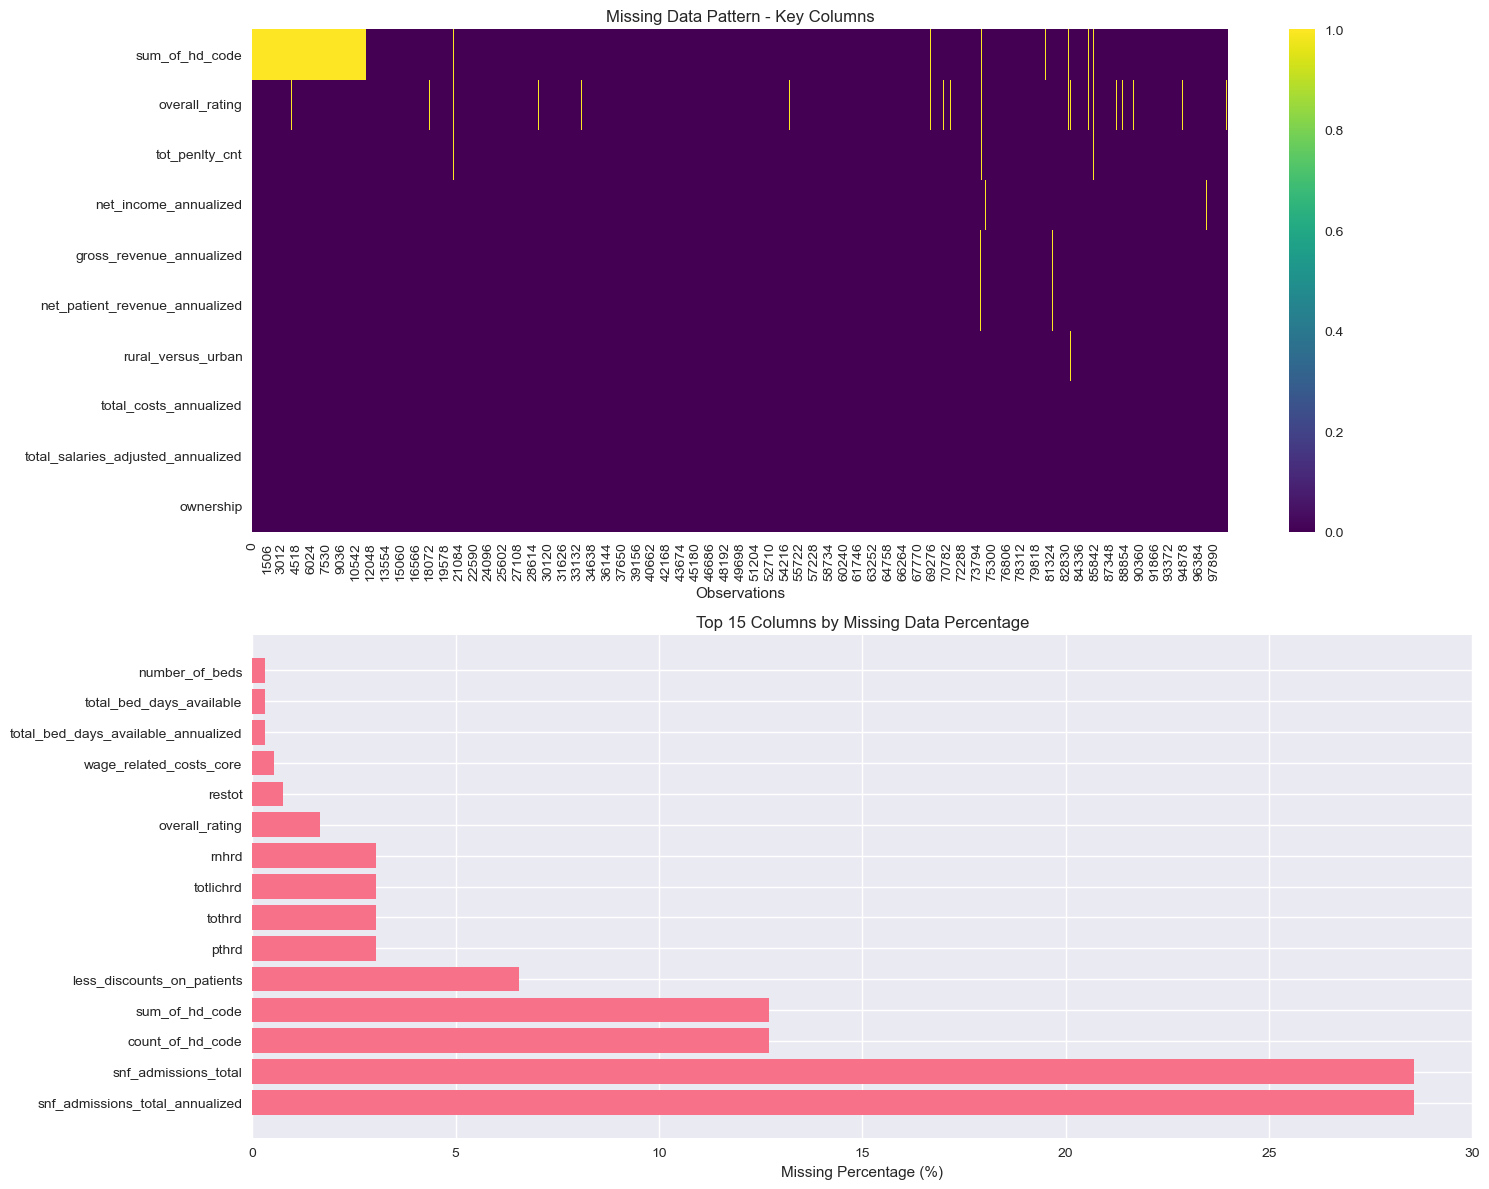


CATEGORICAL VARIABLES ANALYSIS

OWNERSHIP:
ownership
For profit - Corporation                  57498
Non profit - Corporation                  16049
For profit - Partnership                   6481
For profit - Individual                    4819
For profit - Limited Liability company     4455
Non profit - Church related                3078
Government - County                        2580
Non profit - Other                         1854
Government - Hospital district              971
Government - State                          582
Government - City/county                    463
Government - City                           447
Government - Federal                         73
Name: count, dtype: int64

OVERALL_RATING:
overall_rating
5.0    23116
4.0    21942
2.0    19539
3.0    17806
1.0    15290
Name: count, dtype: int64

RURAL_VERSUS_URBAN:
rural_versus_urban
U    72294
R    27036
Name: count, dtype: int64


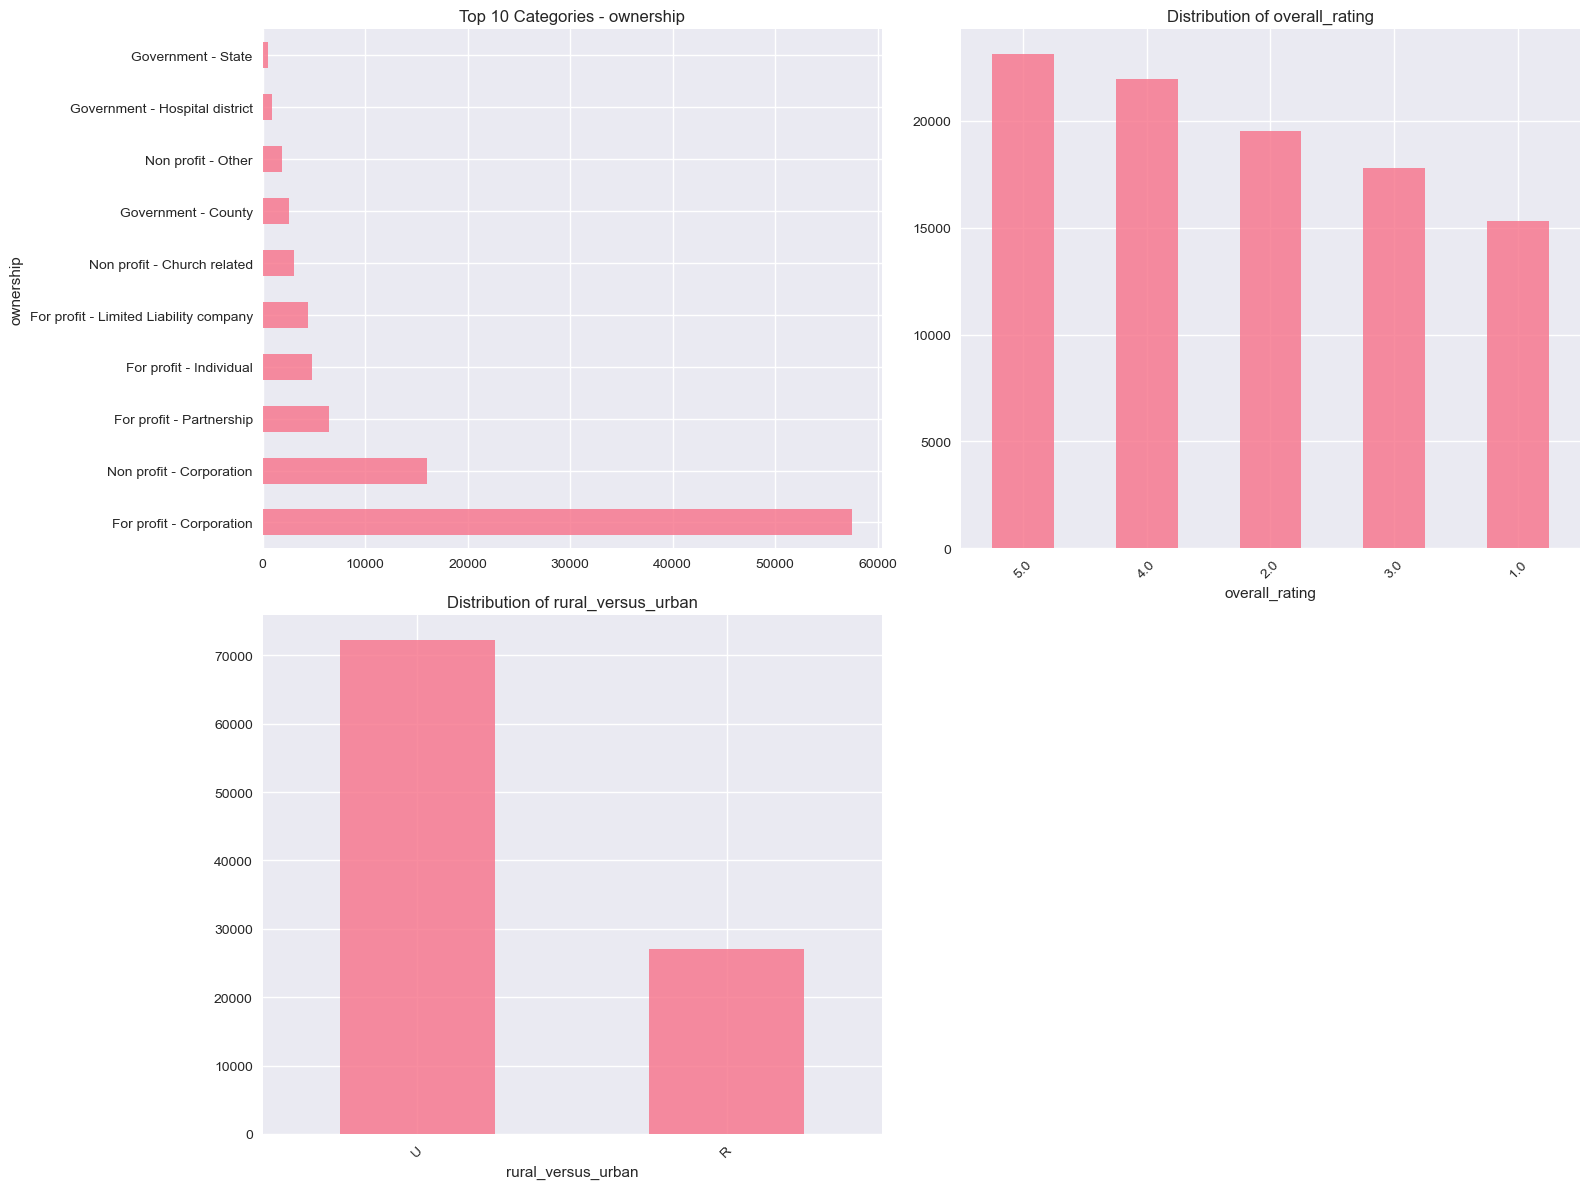


NUMERICAL VARIABLES ANALYSIS
FINANCIAL METRICS SUMMARY:
       gross_revenue_annualized  net_income_annualized  \
count              9.917300e+04           9.910600e+04   
mean               1.240278e+07           6.729208e+04   
std                1.340793e+07           2.652025e+06   
min               -1.669697e+07          -1.570276e+08   
25%                6.222251e+06          -4.187738e+05   
50%                9.938415e+06           7.645794e+04   
75%                1.529472e+07           5.856542e+05   
max                1.303979e+09           2.101763e+08   

       net_patient_revenue_annualized  total_costs_annualized  \
count                    9.917700e+04            9.934900e+04   
mean                     9.771825e+06            1.044232e+07   
std                      8.886294e+06            8.426997e+06   
min                     -2.075773e+07            3.997400e+04   
25%                      5.297795e+06            5.640653e+06   
50%                      8.099

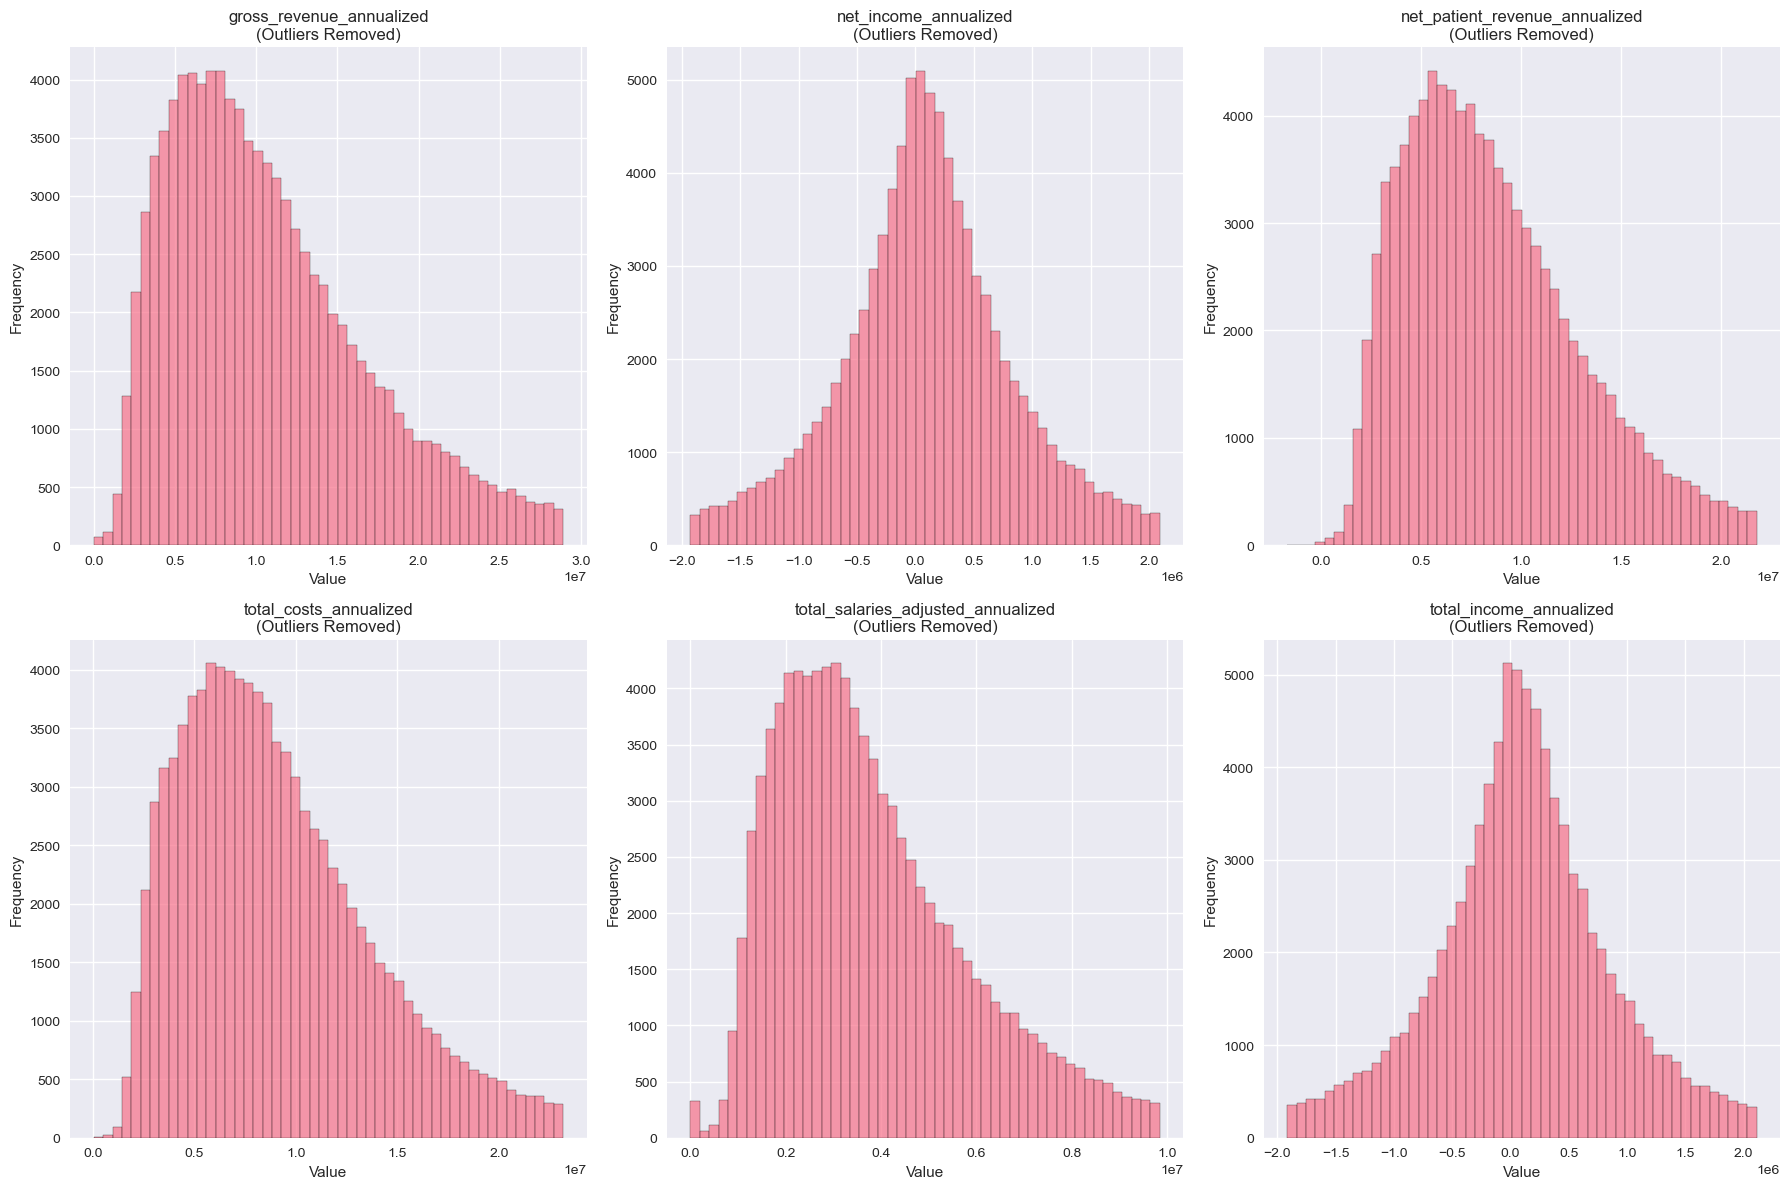


CORRELATION ANALYSIS


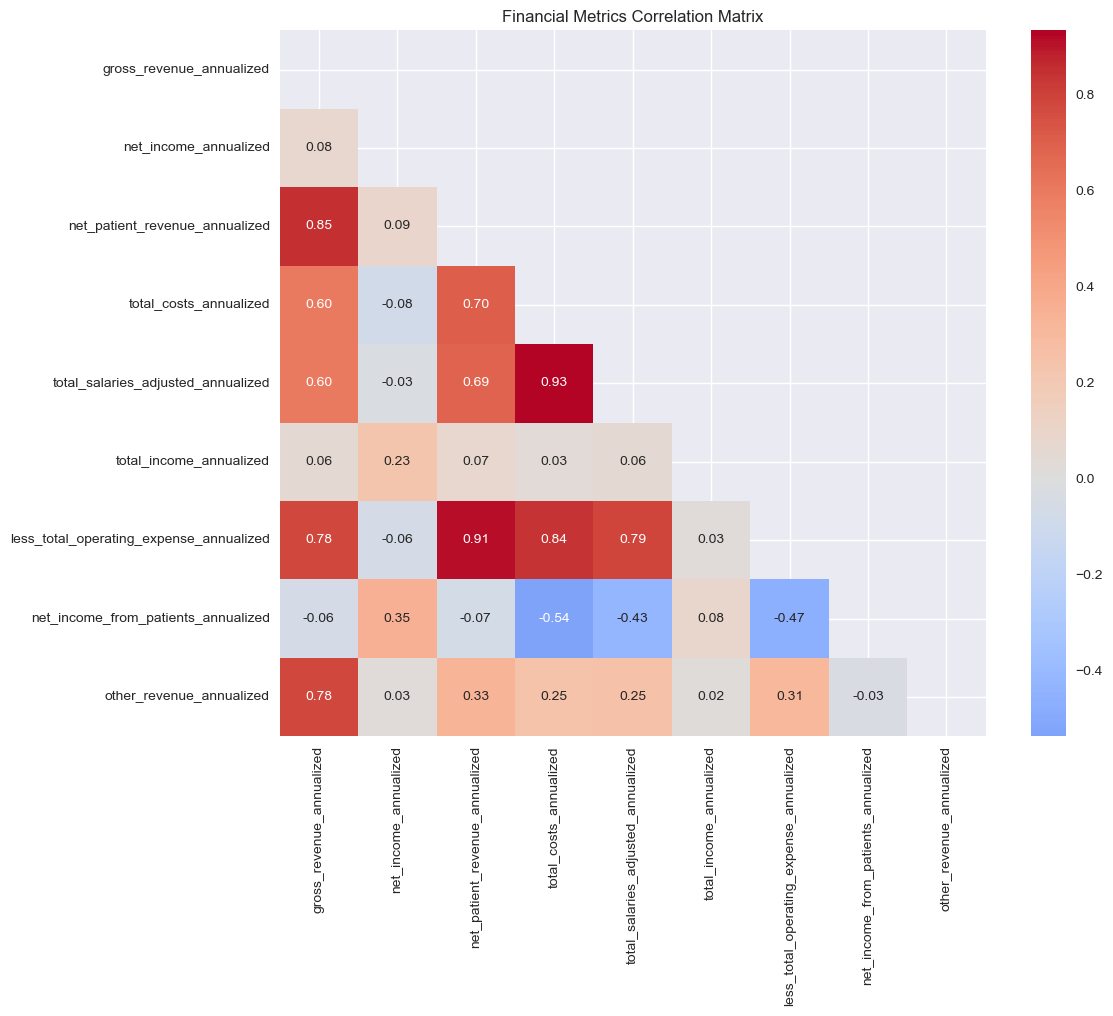

High Financial Correlations (|r| > 0.7):
  total_costs_annualized vs total_salaries_adjusted_annualized: 0.933
  net_patient_revenue_annualized vs less_total_operating_expense_annualized: 0.913
  gross_revenue_annualized vs net_patient_revenue_annualized: 0.850
  total_costs_annualized vs less_total_operating_expense_annualized: 0.840
  total_salaries_adjusted_annualized vs less_total_operating_expense_annualized: 0.786
  gross_revenue_annualized vs other_revenue_annualized: 0.781
  gross_revenue_annualized vs less_total_operating_expense_annualized: 0.778
  net_patient_revenue_annualized vs total_costs_annualized: 0.701

--------------------------------------------------
FINANCIAL vs CATEGORICAL ANALYSIS
--------------------------------------------------

OVERALL_RATING vs FINANCIAL METRICS:
----------------------------------------
  gross_revenue_annualized:
    ANOVA: p-value = 0.0000 ***
    Eta-squared: 0.0032
    Group Means: {1.0: 11238854.725683967, 2.0: 12117766.05262745, 3.0:

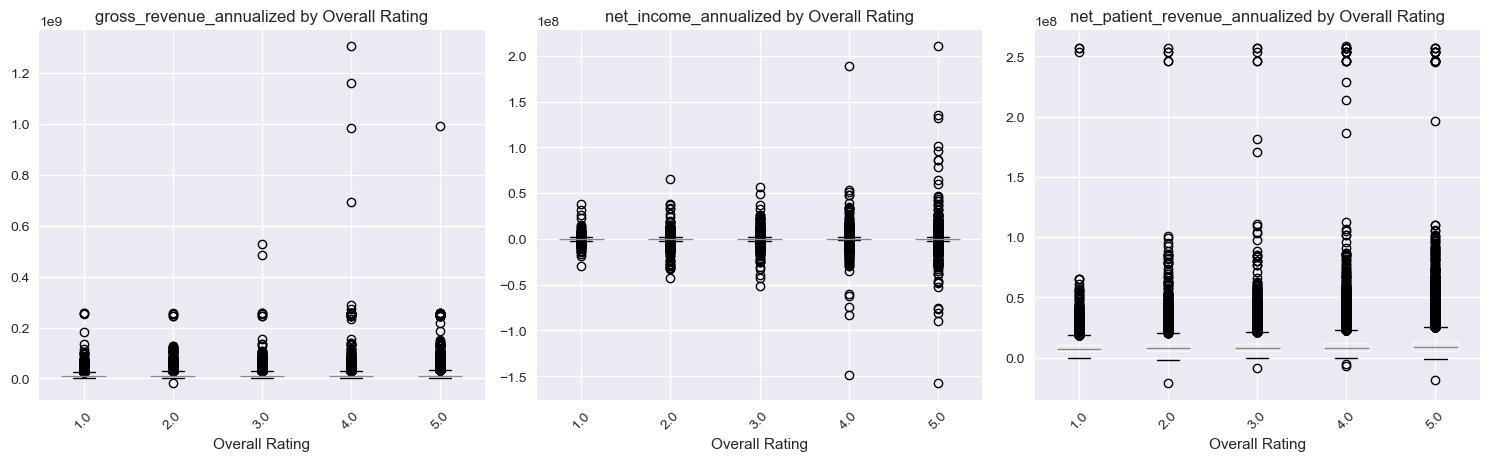

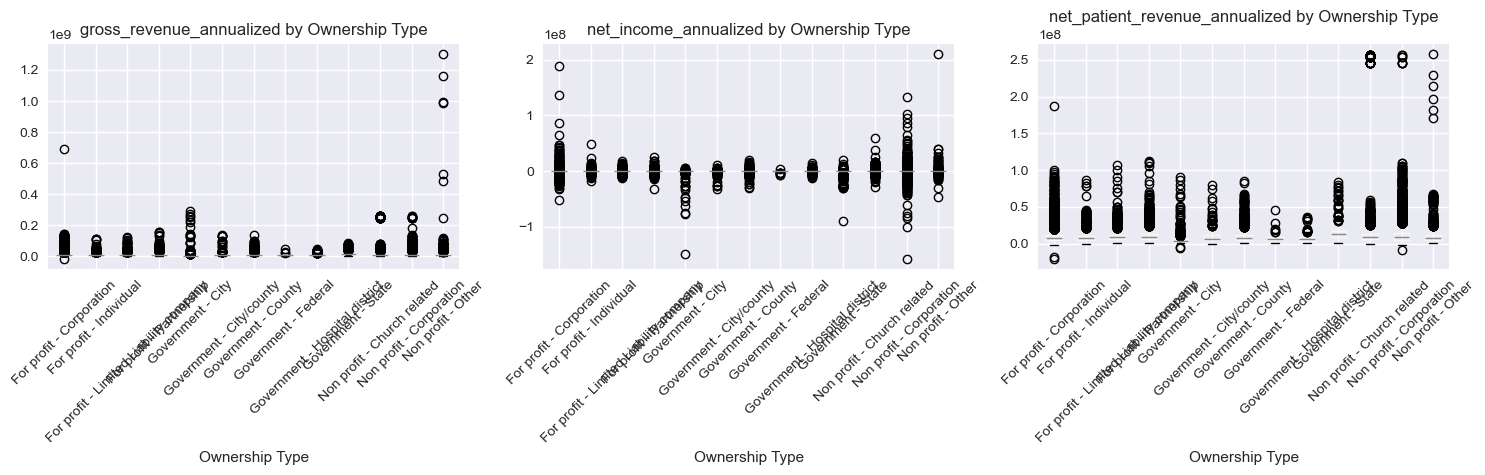

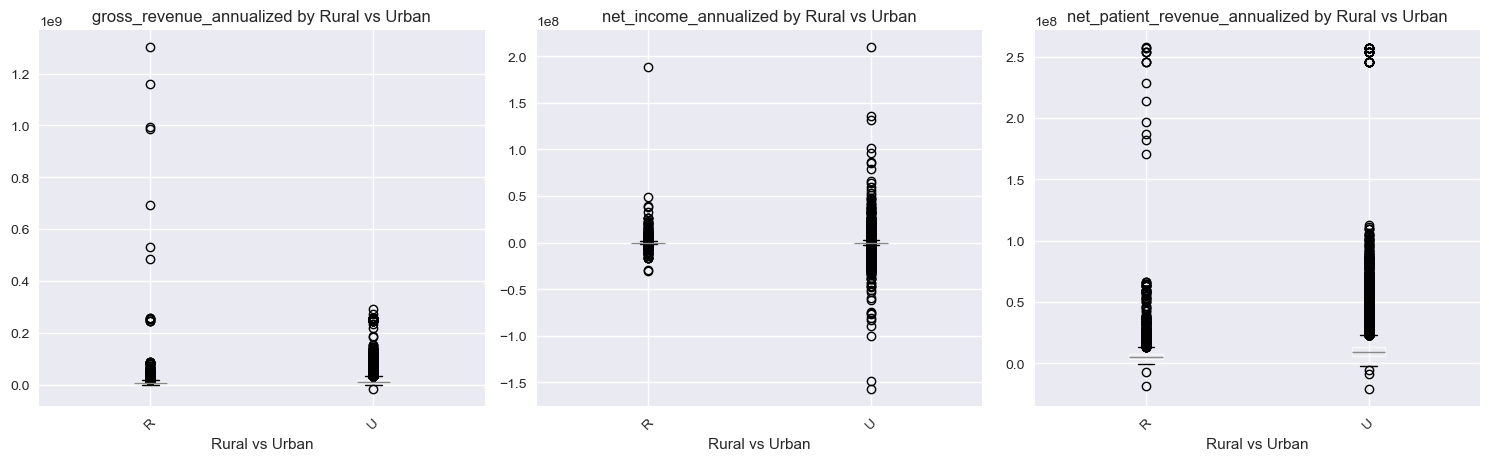


TEMPORAL TRENDS ANALYSIS


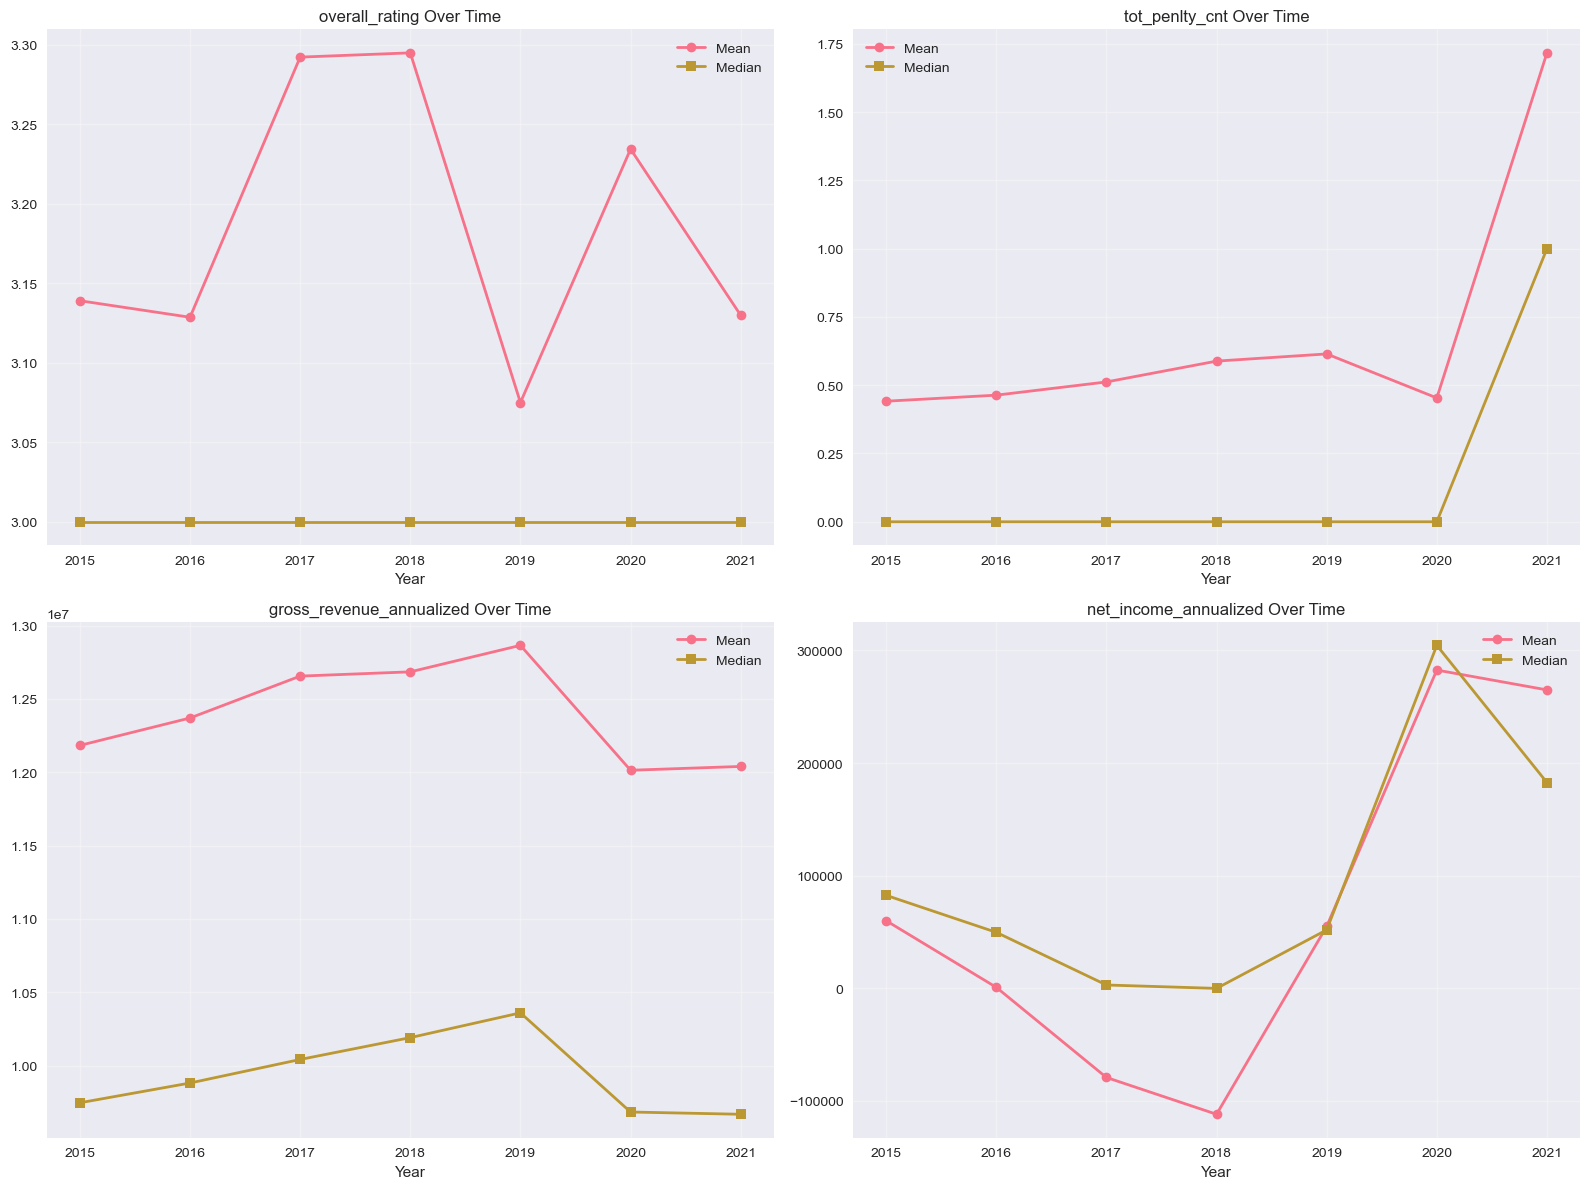


OUTLIER ANALYSIS
Outlier Summary (Top 10):
                                           count  percentage   lower_bound  \
total_income_annualized                  10464.0   10.553813 -1.914202e+06   
net_income_annualized                    10419.0   10.512986 -1.925416e+06   
net_income_from_patients_annualized      10365.0   10.433443 -2.671423e+06   
other_revenue_annualized                  7284.0    7.344741 -3.912122e+06   
less_total_operating_expense_annualized   5458.0    5.493820 -4.886066e+06   
total_costs_annualized                    5316.0    5.350834 -4.871791e+06   
total_bed_days_available_annualized       4968.0    5.016560 -5.307040e+03   
total_salaries_adjusted_annualized        4971.0    5.003573 -2.162141e+06   
gross_revenue_annualized                  4840.0    4.880361 -7.386457e+06   
net_patient_revenue_annualized            4721.0    4.760176 -4.578137e+06   

                                          upper_bound  
total_income_annualized                  

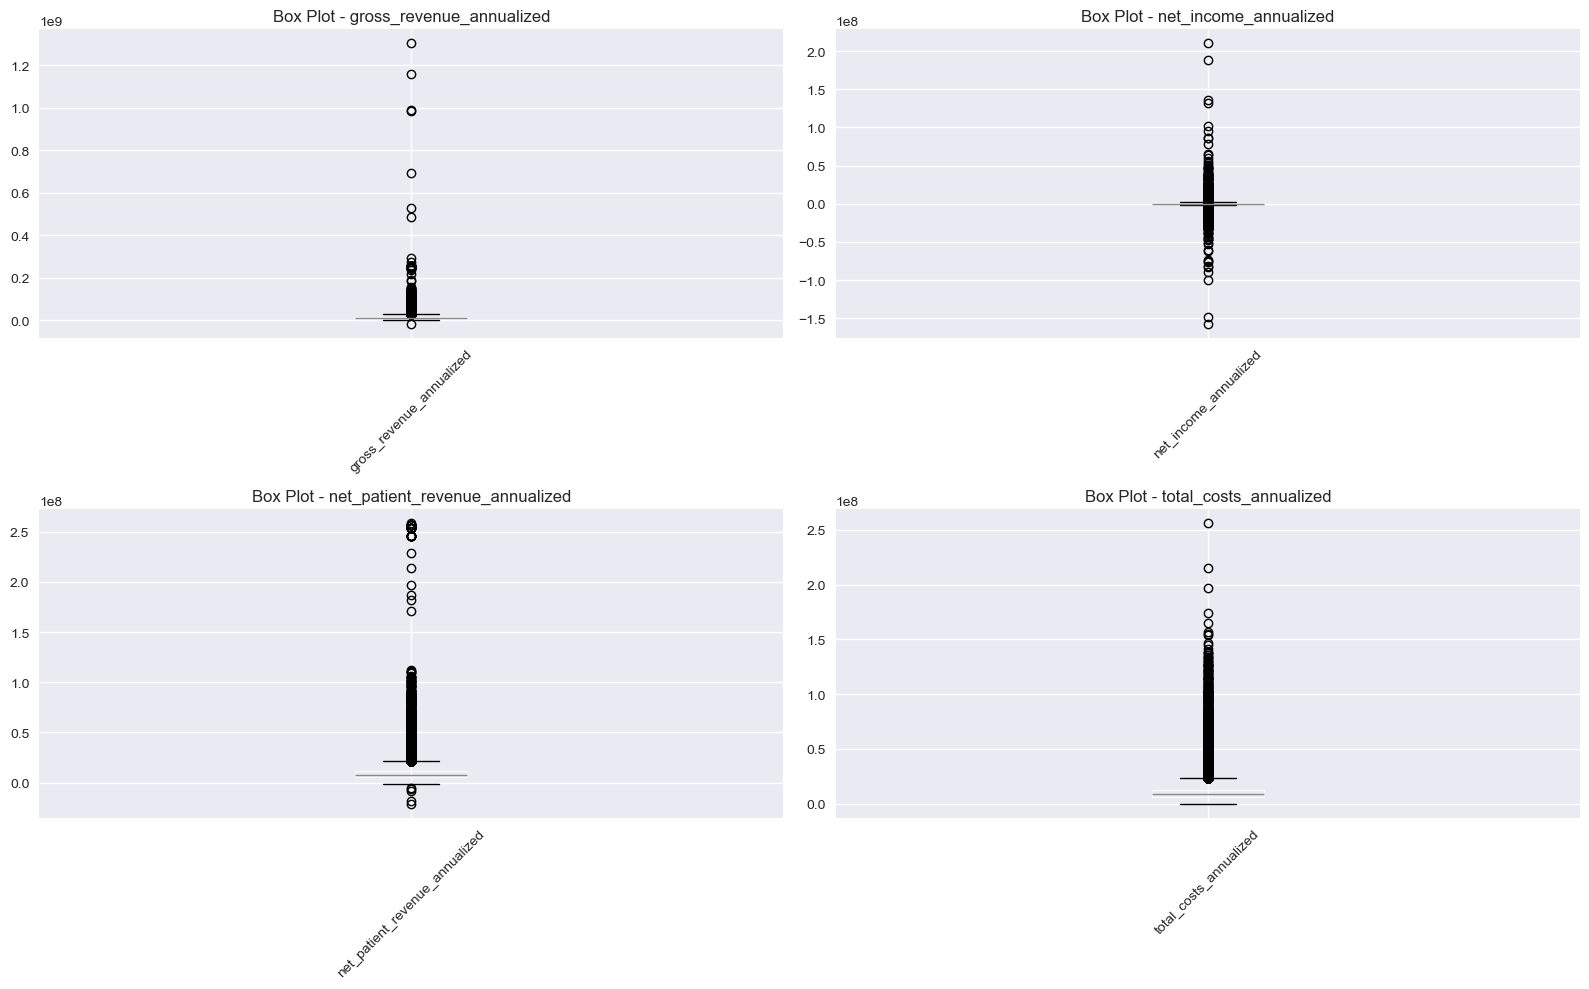


OWNERSHIP TYPE ANALYSIS
Financial Performance by Ownership Type:
                                       gross_revenue_annualized                \
                                                           mean        median   
ownership                                                                       
For profit - Corporation                           1.169680e+07  9.759950e+06   
For profit - Individual                            1.084680e+07  8.691263e+06   
For profit - Limited Liability company             1.246549e+07  1.030038e+07   
For profit - Partnership                           1.319605e+07  1.090738e+07   
Government - City                                  1.200655e+07  3.818368e+06   
Government - City/county                           1.186486e+07  7.054304e+06   
Government - County                                1.158539e+07  9.172251e+06   
Government - Federal                               8.886333e+06  7.391786e+06   
Government - Hospital district             

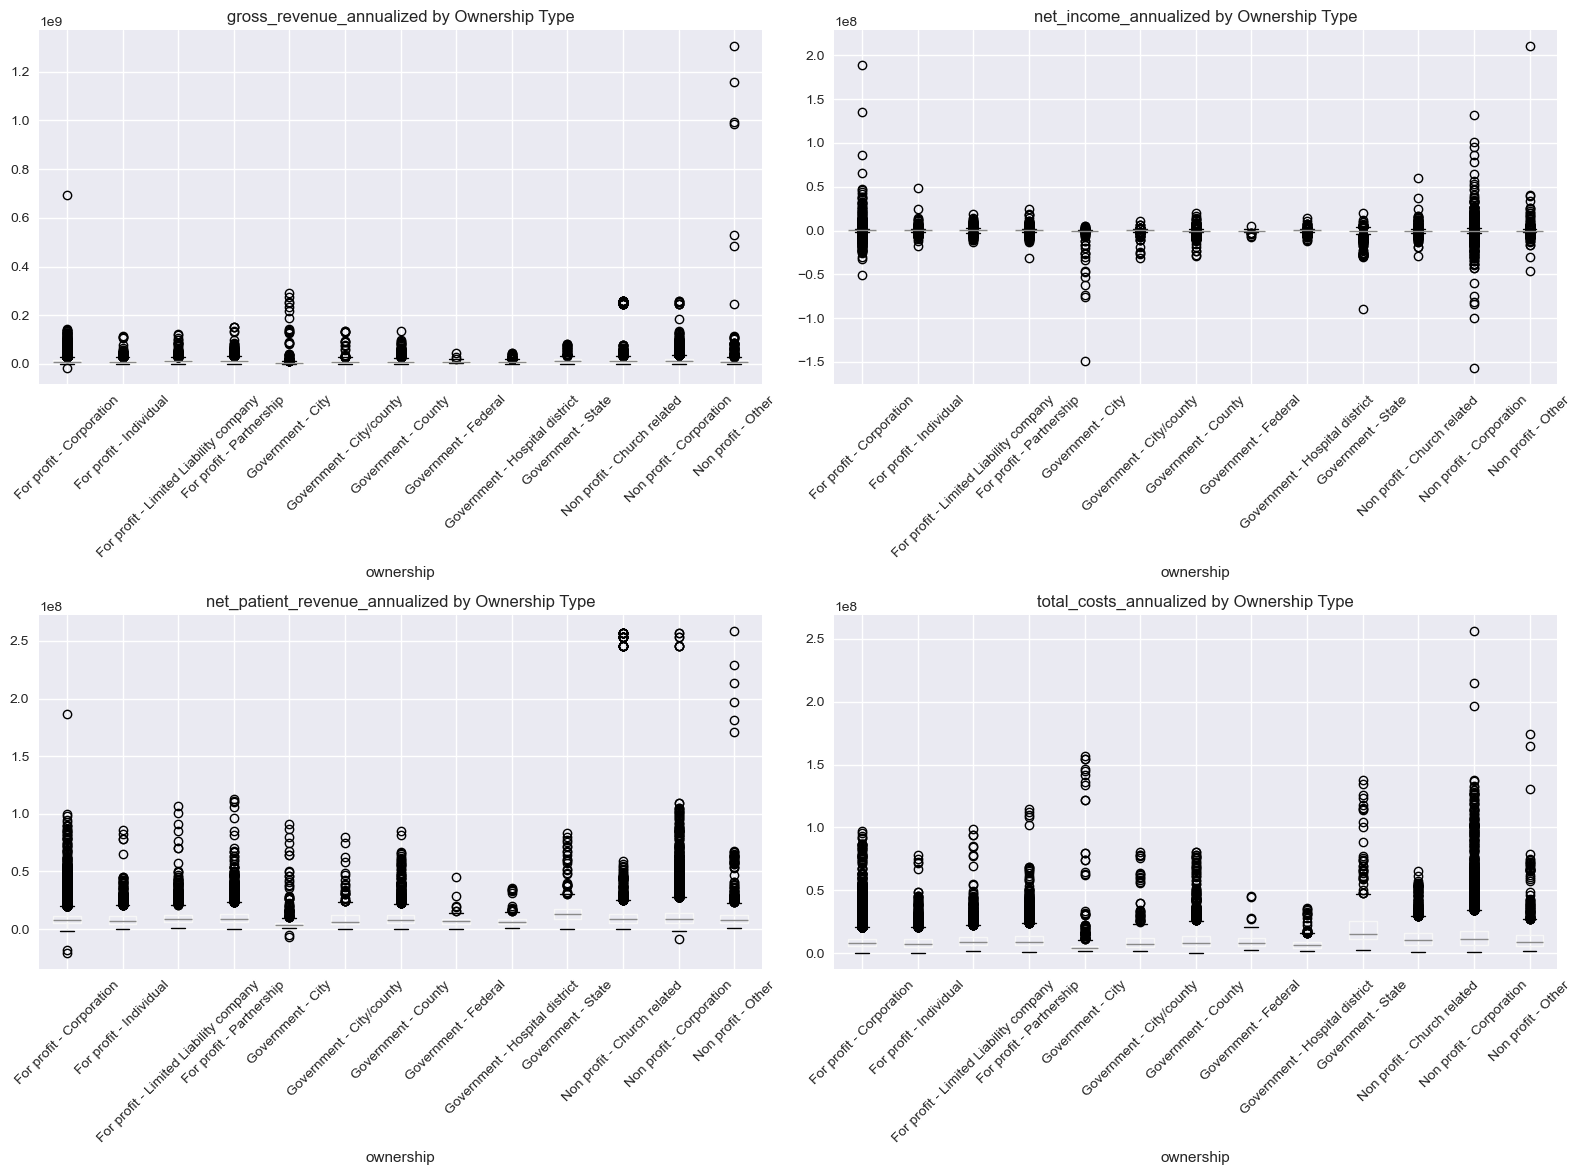


QUALITY ANALYSIS
Overall Rating Distribution:
overall_rating
1.0    15290
2.0    19539
3.0    17806
4.0    21942
5.0    23116
Name: count, dtype: int64

Penalties by Overall Rating:
                    mean  median  count
overall_rating                         
1.0             1.537868     1.0  15290
2.0             1.053073     1.0  19539
3.0             0.551724     0.0  17806
4.0             0.349284     0.0  21942
5.0             0.209076     0.0  23116


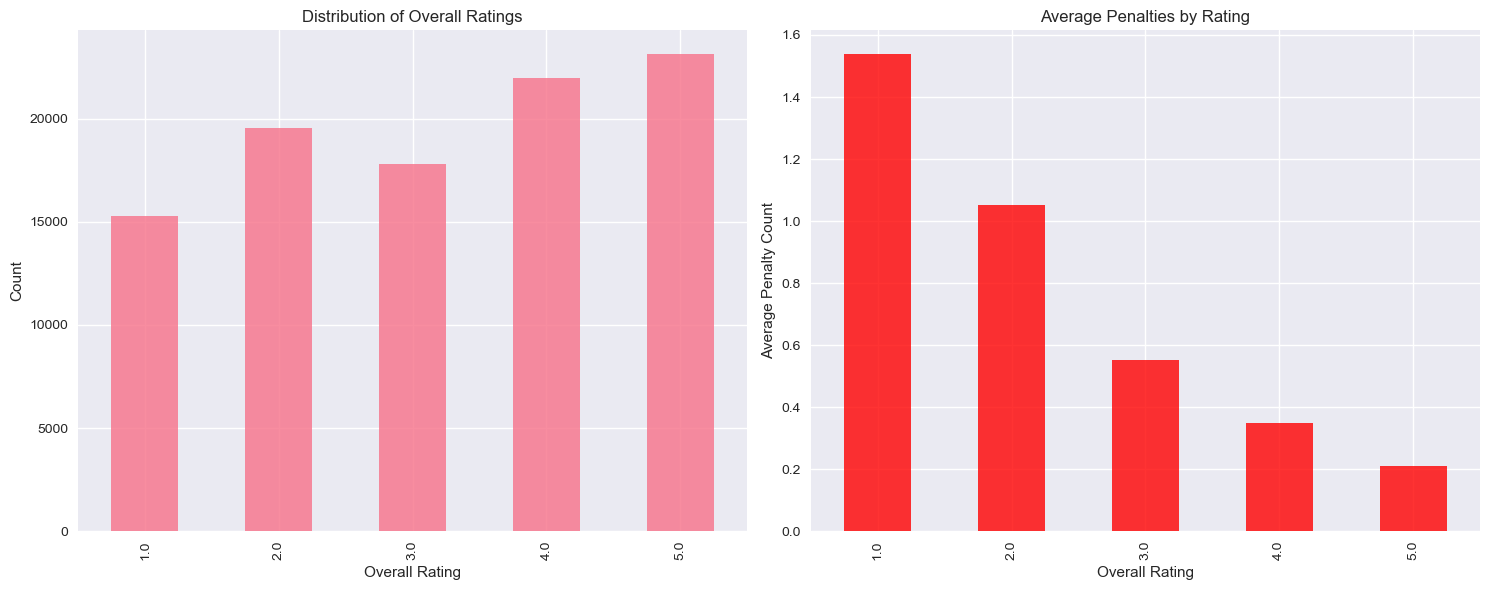


EDA COMPLETE
Summary of key findings:
1. Panel structure and balance
2. Missing data patterns
3. Distribution of categorical variables
4. Financial and operational metrics distributions
5. Correlation patterns
6. Temporal trends (2015-2021)
7. Outlier identification
8. Performance by ownership type
9. Quality ratings and penalties relationship


In [5]:
# Initialize and run EDA
eda = NursingHomeEDA(nursing_df)
eda.run_comprehensive_eda()
 
# Or run individual analyses:
# eda.basic_info()
# eda.panel_structure_analysis()
# eda.financial_analysis()
# etc.

In [11]:
#!pip install linearmodels
from linearmodels import PanelOLS, RandomEffects
from linearmodels.panel import compare
import statsmodels.api as sm

class PanelDataAnalysis:
    """
    Comprehensive panel data analysis for nursing home data
    Compares Fixed Effects vs Random Effects models with Hausman test
    """
    
    def __init__(self, df, entity_col='provider_id', time_col='year'):
        """
        Initialize the panel data analysis
        
        Parameters:
        df (DataFrame): Panel data with nursing homes
        entity_col (str): Column name for entity identifier (facility ID)
        time_col (str): Column name for time identifier (year)
        """
        self.df = df.copy()
        self.entity_col = entity_col
        self.time_col = time_col
        
        # Dependent variable
        self.y_var = 'net_income_annualized'
        
        # Independent variables for Fixed Effects
        self.fe_x_vars = [
            'overall_rating',
            'tot_penlty_cnt', 
            'sum_of_hd_code',
            'total_bed_days_available_annualized'
        ]
        
        # Independent variables for Random Effects (includes time-invariant variables)
        self.re_x_vars = [
            'ownership',
            'rural_versus_urban',
            'overall_rating',
            'tot_penlty_cnt',
            'sum_of_hd_code', 
            'total_bed_days_available_annualized',
            'less_total_operating_expense_annualized'
        ]
        
        # Results storage
        self.fe_results = None
        self.re_results = None
        self.hausman_results = None
        
    def prepare_data(self):
        """Prepare data for panel regression analysis"""
        print("=" * 60)
        print("DATA PREPARATION FOR PANEL ANALYSIS")
        print("=" * 60)
        
        # Check if required columns exist
        required_cols = [self.entity_col, self.time_col, self.y_var] + self.re_x_vars
        missing_cols = [col for col in required_cols if col not in self.df.columns]
        
        if missing_cols:
            print(f"Warning: Missing columns: {missing_cols}")
            print("Please ensure all required columns are in your dataset.")
            return False
        
        # Create working dataset
        self.working_df = self.df[required_cols].copy()
        
        # Remove rows with missing dependent variable
        initial_rows = len(self.working_df)
        self.working_df = self.working_df.dropna(subset=[self.y_var])
        
        print(f"Initial observations: {initial_rows:,}")
        print(f"After removing missing y-variable: {len(self.working_df):,}")
        
        # Set panel index
        self.working_df = self.working_df.set_index([self.entity_col, self.time_col])
        
        # Basic panel structure info
        n_entities = self.working_df.index.get_level_values(0).nunique()
        n_time_periods = self.working_df.index.get_level_values(1).nunique()
        
        print(f"Number of entities (nursing homes): {n_entities:,}")
        print(f"Number of time periods: {n_time_periods}")
        print(f"Panel is {'balanced' if len(self.working_df) == n_entities * n_time_periods else 'unbalanced'}")
        
        # Check for missing values in X variables
        print(f"\nMissing values in X variables:")
        for var in self.re_x_vars:
            missing_count = self.working_df[var].isnull().sum()
            missing_pct = (missing_count / len(self.working_df)) * 100
            print(f"  {var}: {missing_count:,} ({missing_pct:.1f}%)")
        
        return True
    
    def descriptive_statistics(self):
        """Display descriptive statistics for panel data"""
        print("\n" + "=" * 60)
        print("DESCRIPTIVE STATISTICS")
        print("=" * 60)
        
        # Overall statistics
        print("DEPENDENT VARIABLE:")
        print(f"{self.y_var}:")
        y_stats = self.working_df[self.y_var].describe()
        for stat, value in y_stats.items():
            print(f"  {stat}: {value:,.2f}")
        
        print(f"\nINDEPENDENT VARIABLES:")
        desc_stats = self.working_df[self.re_x_vars].describe()
        print(desc_stats)
        
        # Within and between variation (key for panel data)
        print(f"\nPANEL DATA VARIATION DECOMPOSITION:")
        print(f"(Within = variation within entities over time)")
        print(f"(Between = variation between entities)")
        
        for var in [self.y_var] + self.fe_x_vars:
            if var in self.working_df.columns:
                # Overall variance
                overall_var = self.working_df[var].var()
                
                # Within variance (demeaned by entity)
                entity_means = self.working_df.groupby(level=0)[var].transform('mean')
                within_var = (self.working_df[var] - entity_means).var()
                
                # Between variance 
                entity_means_unique = self.working_df.groupby(level=0)[var].mean()
                between_var = entity_means_unique.var()
                
                print(f"\n{var}:")
                print(f"  Overall variance: {overall_var:.2f}")
                print(f"  Within variance:  {within_var:.2f} ({within_var/overall_var*100:.1f}%)")
                print(f"  Between variance: {between_var:.2f} ({between_var/overall_var*100:.1f}%)")
    
    def run_fixed_effects(self):
        """Run Fixed Effects regression"""
        print("\n" + "=" * 60)
        print("FIXED EFFECTS MODEL")
        print("=" * 60)
        
        # Prepare data for FE (remove missing values)
        fe_data = self.working_df[[self.y_var] + self.fe_x_vars].dropna()
        
        print(f"Observations used in FE model: {len(fe_data):,}")
        print(f"Entities used in FE model: {fe_data.index.get_level_values(0).nunique():,}")
        
        # Run Fixed Effects regression
        try:
            y = fe_data[self.y_var]
            X = fe_data[self.fe_x_vars]
            
            # Entity fixed effects
            self.fe_results = PanelOLS(y, X, entity_effects=True).fit(cov_type='clustered', cluster_entity=True)
            
            print("Fixed Effects Results:")
            print(self.fe_results)
            
            # Model fit statistics
            print(f"\nModel Fit Statistics:")
            print(f"R-squared (overall): {self.fe_results.rsquared:.4f}")
            print(f"R-squared (within): {self.fe_results.rsquared_within:.4f}")
            print(f"R-squared (between): {self.fe_results.rsquared_between:.4f}")
            print(f"F-statistic: {self.fe_results.f_statistic.stat:.2f}")
            print(f"F-statistic p-value: {self.fe_results.f_statistic.pval:.4f}")
            
        except Exception as e:
            print(f"Error running Fixed Effects model: {str(e)}")
            self.fe_results = None
    
    def run_random_effects(self):
        """Run Random Effects regression"""
        print("\n" + "=" * 60)
        print("RANDOM EFFECTS MODEL")
        print("=" * 60)
        
        # Prepare data for RE (remove missing values)
        re_data = self.working_df[[self.y_var] + self.re_x_vars].dropna()
        
        print(f"Observations used in RE model: {len(re_data):,}")
        print(f"Entities used in RE model: {re_data.index.get_level_values(0).nunique():,}")
        
        # Run Random Effects regression
        try:
            y = re_data[self.y_var]
            X = re_data[self.re_x_vars]
            
            self.re_results = RandomEffects(y, X).fit(cov_type='clustered', cluster_entity=True)
            
            print("Random Effects Results:")
            print(self.re_results)
            
            # Model fit statistics
            print(f"\nModel Fit Statistics:")
            print(f"R-squared (overall): {self.re_results.rsquared:.4f}")
            print(f"R-squared (within): {self.re_results.rsquared_within:.4f}")
            print(f"R-squared (between): {self.re_results.rsquared_between:.4f}")
            #print(f"Theta (RE parameter): {self.re_results.theta:.4f}")
            
        except Exception as e:
            print(f"Error running Random Effects model: {str(e)}")
            self.re_results = None
    
    def hausman_test(self):
        """Perform Hausman test to compare FE vs RE"""
        print("\n" + "=" * 60)
        print("HAUSMAN TEST: FIXED EFFECTS vs RANDOM EFFECTS")
        print("=" * 60)
        
        if self.fe_results is None or self.re_results is None:
            print("Error: Both FE and RE models must be estimated first.")
            return
        
        try:
            # Get common variables (FE model variables only, since RE includes more)
            common_vars = self.fe_x_vars
            
            # Extract coefficients for common variables
            fe_coefs = []
            re_coefs = []
            var_names = []
            
            for var in common_vars:
                if var in self.fe_results.params.index and var in self.re_results.params.index:
                    fe_coefs.append(self.fe_results.params[var])
                    re_coefs.append(self.re_results.params[var])
                    var_names.append(var)
            
            fe_coefs = np.array(fe_coefs)
            re_coefs = np.array(re_coefs)
            
            # Extract covariance matrices for common variables
            fe_cov = self.fe_results.cov.loc[var_names, var_names].values
            re_cov = self.re_results.cov.loc[var_names, var_names].values
            
            # Hausman test statistic
            # H = (b_fe - b_re)' * [Var(b_fe) - Var(b_re)]^(-1) * (b_fe - b_re)
            coef_diff = fe_coefs - re_coefs
            cov_diff = fe_cov - re_cov
            
            # Check if covariance difference is invertible
            try:
                cov_diff_inv = np.linalg.inv(cov_diff)
                hausman_stat = coef_diff.T @ cov_diff_inv @ coef_diff
                df = len(common_vars)
                p_value = 1 - stats.chi2.cdf(hausman_stat, df)
                
                print("Hausman Test Results:")
                print("-" * 30)
                print(f"Test Statistic (Chi-square): {hausman_stat:.4f}")
                print(f"Degrees of Freedom: {df}")
                print(f"P-value: {p_value:.4f}")
                
                # Interpretation
                if p_value < 0.05:
                    print(f"\n*** RESULT: p-value < 0.05 ***")
                    print("REJECT the null hypothesis")
                    print("=> Fixed Effects model is MORE APPROPRIATE")
                    print("=> There is significant correlation between individual effects and regressors")
                    recommendation = "Fixed Effects"
                else:
                    print(f"\n*** RESULT: p-value >= 0.05 ***")
                    print("FAIL TO REJECT the null hypothesis") 
                    print("=> Random Effects model is VALID and more efficient")
                    print("=> No significant correlation between individual effects and regressors")
                    recommendation = "Random Effects"
                
                print(f"\nRECOMMENDED MODEL: {recommendation}")
                
                # Store results
                self.hausman_results = {
                    'statistic': hausman_stat,
                    'p_value': p_value,
                    'df': df,
                    'recommendation': recommendation
                }
                
                # Coefficient comparison table
                print(f"\nCOEFFICIENT COMPARISON:")
                print("-" * 50)
                comparison_df = pd.DataFrame({
                    'Variable': var_names,
                    'Fixed_Effects': fe_coefs,
                    'Random_Effects': re_coefs,
                    'Difference': coef_diff,
                    'FE_StdErr': [np.sqrt(fe_cov[i,i]) for i in range(len(var_names))],
                    'RE_StdErr': [np.sqrt(re_cov[i,i]) for i in range(len(var_names))]
                })
                print(comparison_df.round(4))
                
            except np.linalg.LinAlgError:
                print("Warning: Covariance matrix difference is not invertible.")
                print("This may indicate multicollinearity or insufficient variation.")
                print("Manual comparison of coefficients:")
                
                comparison_df = pd.DataFrame({
                    'Variable': var_names,
                    'Fixed_Effects': fe_coefs,
                    'Random_Effects': re_coefs,
                    'Difference': coef_diff
                })
                print(comparison_df.round(4))
                
        except Exception as e:
            print(f"Error performing Hausman test: {str(e)}")
            print("Manual comparison of models:")
            self.compare_models_manually()
    
    def compare_models_manually(self):
        """Manual comparison when Hausman test fails"""
        print("\nMANUAL MODEL COMPARISON:")
        print("-" * 40)
        
        if self.fe_results and self.re_results:
            print("Fixed Effects Model Summary:")
            print(f"  R-squared (within): {self.fe_results.rsquared_within:.4f}")
            print(f"  F-statistic p-value: {self.fe_results.f_statistic.pval:.4f}")
            
            print("\nRandom Effects Model Summary:")
            print(f"  R-squared (overall): {self.re_results.rsquared:.4f}")
            print(f"  R-squared (within): {self.re_results.rsquared_within:.4f}")
            print(f"  R-squared (between): {self.re_results.rsquared_between:.4f}")
    
    def visualize_results(self):
        """Create visualizations for model results"""
        if self.fe_results is None and self.re_results is None:
            print("No results to visualize. Run models first.")
            return
        
        print("\n" + "=" * 60)
        print("MODEL VISUALIZATION")
        print("=" * 60)
        
        # Coefficient comparison plot
        if self.fe_results and self.re_results:
            common_vars = [var for var in self.fe_x_vars 
                          if var in self.fe_results.params.index and var in self.re_results.params.index]
            
            if common_vars:
                fe_coefs = [self.fe_results.params[var] for var in common_vars]
                re_coefs = [self.re_results.params[var] for var in common_vars]
                fe_se = [self.fe_results.std_errors[var] for var in common_vars]
                re_se = [self.re_results.std_errors[var] for var in common_vars]
                
                fig, ax = plt.subplots(figsize=(12, 8))
                
                x = np.arange(len(common_vars))
                width = 0.35
                
                # Coefficient bars
                bars1 = ax.bar(x - width/2, fe_coefs, width, label='Fixed Effects', 
                              alpha=0.8, capsize=5)
                bars2 = ax.bar(x + width/2, re_coefs, width, label='Random Effects', 
                              alpha=0.8, capsize=5)
                
                # Error bars
                ax.errorbar(x - width/2, fe_coefs, yerr=fe_se, fmt='none', 
                           color='black', capsize=3)
                ax.errorbar(x + width/2, re_coefs, yerr=re_se, fmt='none', 
                           color='black', capsize=3)
                
                ax.set_xlabel('Variables')
                ax.set_ylabel('Coefficient Value')
                ax.set_title('Coefficient Comparison: Fixed Effects vs Random Effects')
                ax.set_xticks(x)
                ax.set_xticklabels(common_vars, rotation=45, ha='right')
                ax.legend()
                ax.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.show()
        
        # Residual analysis for recommended model
        if self.hausman_results and self.hausman_results['recommendation'] == 'Fixed Effects':
            recommended_model = self.fe_results
            model_name = "Fixed Effects"
        elif self.re_results:
            recommended_model = self.re_results
            model_name = "Random Effects"
        else:
            recommended_model = None
        
        if recommended_model:
            # Residual plots
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Fitted vs Residuals
            fitted = recommended_model.fitted_values
            residuals = recommended_model.resids
            
            ax1.scatter(fitted, residuals, alpha=0.6)
            ax1.axhline(y=0, color='red', linestyle='--')
            ax1.set_xlabel('Fitted Values')
            ax1.set_ylabel('Residuals')
            ax1.set_title(f'{model_name} Model: Fitted vs Residuals')
            ax1.grid(True, alpha=0.3)
            
            # Q-Q plot
            stats.probplot(residuals, dist="norm", plot=ax2)
            ax2.set_title(f'{model_name} Model: Q-Q Plot')
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
    
    def model_interpretation(self):
        """Provide economic interpretation of results"""
        print("\n" + "=" * 60)
        print("MODEL INTERPRETATION & BUSINESS INSIGHTS")
        print("=" * 60)
        
        if self.hausman_results:
            recommended = self.hausman_results['recommendation']
            results = self.fe_results if recommended == 'Fixed Effects' else self.re_results
            
            print(f"RECOMMENDED MODEL: {recommended}")
            print("-" * 40)
            
            if results:
                print("KEY FINDINGS:")
                
                # Interpret coefficients
                for var in results.params.index:
                    if var != 'const':
                        coef = results.params[var]
                        pval = results.pvalues[var]
                        sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""
                        
                        # Economic interpretation
                        if var == 'overall_rating':
                            interpretation = f"Each 1-point increase in quality rating is associated with ${coef:,.0f} change in net income {sig}"
                        elif var == 'tot_penlty_cnt':
                            interpretation = f"Each additional penalty is associated with ${coef:,.0f} change in net income {sig}"
                        elif var == 'total_bed_days_available_annualized':
                            interpretation = f"Each additional bed-day availability is associated with ${coef:.2f} change in net income {sig}"
                        else:
                            interpretation = f"{var}: ${coef:,.0f} coefficient {sig}"
                        
                        print(f"  • {interpretation}")
                
                # Model quality
                if hasattr(results, 'rsquared_within'):
                    print(f"\nMODEL QUALITY:")
                    print(f"  • Within R-squared: {results.rsquared_within:.1%} (variation explained within facilities)")
                    if hasattr(results, 'rsquared_between'):
                        print(f"  • Between R-squared: {results.rsquared_between:.1%} (variation explained between facilities)")
    
    def run_complete_analysis(self):
        """Run the complete panel data analysis pipeline"""
        print("STARTING COMPREHENSIVE PANEL DATA ANALYSIS")
        print("=" * 60)
        
        # Step 1: Prepare data
        if not self.prepare_data():
            return
        
        # Step 2: Descriptive statistics
        self.descriptive_statistics()
        
        # Step 3: Run Fixed Effects
        self.run_fixed_effects()
        
        # Step 4: Run Random Effects  
        self.run_random_effects()
        
        # Step 5: Hausman Test
        self.hausman_test()
        
        # Step 6: Visualizations
        self.visualize_results()
        
        # Step 7: Interpretation
        self.model_interpretation()
        
        print("\n" + "=" * 60)
        print("ANALYSIS COMPLETE")
        print("=" * 60)

STARTING COMPREHENSIVE PANEL DATA ANALYSIS
DATA PREPARATION FOR PANEL ANALYSIS
Initial observations: 99,350
After removing missing y-variable: 99,106
Number of entities (nursing homes): 14,930
Number of time periods: 7
Panel is unbalanced

Missing values in X variables:
  ownership: 0 (0.0%)
  rural_versus_urban: 20 (0.0%)
  overall_rating: 1,656 (1.7%)
  tot_penlty_cnt: 270 (0.3%)
  sum_of_hd_code: 12,625 (12.7%)
  total_bed_days_available_annualized: 318 (0.3%)
  less_total_operating_expense_annualized: 1 (0.0%)

DESCRIPTIVE STATISTICS
DEPENDENT VARIABLE:
net_income_annualized:
  count: 99,106.00
  mean: 67,292.08
  std: 2,652,025.45
  min: -157,027,576.54
  25%: -418,773.83
  50%: 76,457.94
  75%: 585,654.17
  max: 210,176,299.48

INDEPENDENT VARIABLES:
       overall_rating  tot_penlty_cnt  sum_of_hd_code  \
count    97450.000000    98836.000000    86481.000000   
mean         3.185921        0.683759      109.123449   
std          1.401031        1.359451       80.805200   
min  

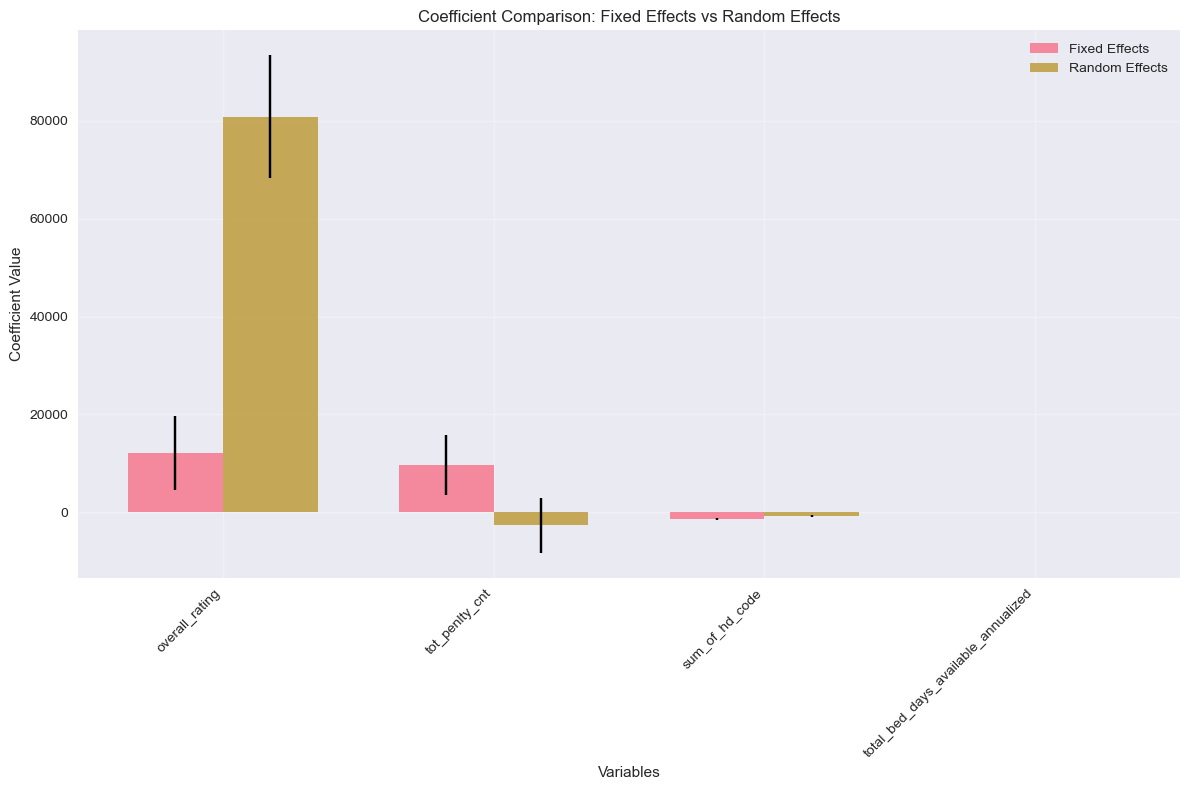

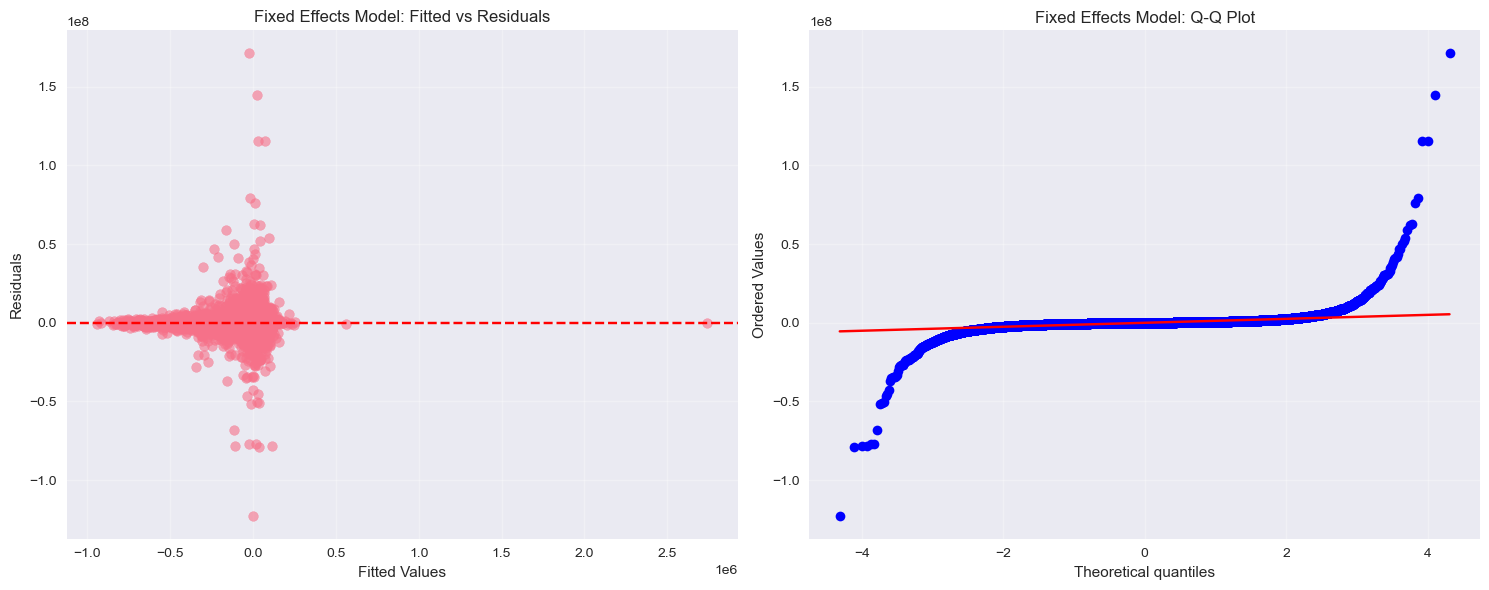


MODEL INTERPRETATION & BUSINESS INSIGHTS
RECOMMENDED MODEL: Fixed Effects
----------------------------------------
KEY FINDINGS:
  • Each 1-point increase in quality rating is associated with $12,125 change in net income 
  • Each additional penalty is associated with $9,631 change in net income 
  • sum_of_hd_code: $-1,348 coefficient ***
  • Each additional bed-day availability is associated with $0.35 change in net income *

MODEL QUALITY:
  • Within R-squared: 0.1% (variation explained within facilities)
  • Between R-squared: -0.1% (variation explained between facilities)

ANALYSIS COMPLETE


In [13]:
# Initialize analysis (adjust column names as needed)
analysis = PanelDataAnalysis(nursing_df, entity_col='provider_ccn', time_col='year') 
# Run complete analysis
analysis.run_complete_analysis()

# Or run individual components:
#analysis.prepare_data()
#analysis.run_fixed_effects()
#analysis.run_random_effects()
#analysis.hausman_test()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import jarque_bera
import warnings
warnings.filterwarnings('ignore')

# Statistical modeling
from linearmodels import PanelOLS
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your data (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')

class ImprovedFixedEffectsAnalysis:
    def __init__(self, df):
        """
        Initialize the analysis with your panel dataset
        
        Parameters:
        df: pandas DataFrame with your nursing home data
        """
        self.df = df.copy()
        self.original_df = df.copy()
        self.results = {}
        self.models = {}
        
    def step1_handle_transformations(self, target_var='net_income_annualized'):
        """
        Step 1: Address skewness and scaling issues with log transformations
        """
        print("=== Step 1: Handling Transformations and Scaling ===")
        
        # Variables to potentially log-transform
        log_candidates = [
            'net_income_annualized',
            'less_total_operating_expense_annualized', 
            'total_bed_days_available_annualized'
        ]
        
        # Check for negative values and handle them
        for var in log_candidates:
            if var in self.df.columns:
                print(f"\nAnalyzing {var}:")
                print(f"  Min value: {self.df[var].min():.2f}")
                print(f"  Max value: {self.df[var].max():.2f}")
                print(f"  Negative values: {(self.df[var] < 0).sum()}")
                print(f"  Zero values: {(self.df[var] == 0).sum()}")
                
                # Handle negative values by adding constant to make all positive
                if self.df[var].min() <= 0:
                    constant = abs(self.df[var].min()) + 1
                    self.df[f'{var}_shifted'] = self.df[var] + constant
                    print(f"  Added constant {constant} to handle negatives/zeros")
                    transform_var = f'{var}_shifted'
                else:
                    transform_var = var
                
                # Apply log transformation
                self.df[f'log_{var}'] = np.log(self.df[transform_var])
                
                # Check skewness before and after
                original_skew = stats.skew(self.df[var].dropna())
                log_skew = stats.skew(self.df[f'log_{var}'].dropna())
                print(f"  Original skewness: {original_skew:.3f}")
                print(f"  Log-transformed skewness: {log_skew:.3f}")
                
                # Visualization
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
                
                # Original distribution
                self.df[var].hist(bins=50, ax=ax1, alpha=0.7)
                ax1.set_title(f'Original {var}')
                ax1.set_xlabel(var)
                
                # Log-transformed distribution  
                self.df[f'log_{var}'].hist(bins=50, ax=ax2, alpha=0.7)
                ax2.set_title(f'Log-transformed {var}')
                ax2.set_xlabel(f'log_{var}')
                
                plt.tight_layout()
                plt.show()
        
        return self.df
    
    def step2_handle_missing_values(self):
        """
        Step 2: Strategic handling of missing values
        """
        print("\n=== Step 2: Handling Missing Values ===")
        
        # Analyze missing patterns
        missing_summary = self.df.isnull().sum()
        missing_pct = (missing_summary / len(self.df)) * 100
        
        print("Missing value summary:")
        for col in missing_summary[missing_summary > 0].index:
            print(f"  {col}: {missing_summary[col]} ({missing_pct[col]:.1f}%)")
        
        # Handle sum_of_hd_code (12.7% missing)
        if 'sum_of_hd_code' in self.df.columns:
            # Create missingness indicator
            self.df['sum_of_hd_code_missing'] = self.df['sum_of_hd_code'].isnull().astype(int)
            
            # Impute with median within entity groups
            if 'provider_ccn' in self.df.columns:
                self.df['sum_of_hd_code_imputed'] = self.df.groupby('provider_ccn')['sum_of_hd_code'].transform(
                    lambda x: x.fillna(x.median())
                )
                # If still missing after group median, use overall median
                overall_median = self.df['sum_of_hd_code'].median()
                self.df['sum_of_hd_code_imputed'].fillna(overall_median, inplace=True)
            else:
                # Simple median imputation
                self.df['sum_of_hd_code_imputed'] = self.df['sum_of_hd_code'].fillna(
                    self.df['sum_of_hd_code'].median()
                )
            
            print(f"Imputed sum_of_hd_code with median values")
        
        # Handle overall_rating (1.7% missing)
        if 'overall_rating' in self.df.columns:
            # Create missingness indicator
            self.df['overall_rating_missing'] = self.df['overall_rating'].isnull().astype(int)
            
            # Mode imputation for categorical rating
            mode_rating = self.df['overall_rating'].mode()[0] if len(self.df['overall_rating'].mode()) > 0 else 3
            self.df['overall_rating_imputed'] = self.df['overall_rating'].fillna(mode_rating)
            
            print(f"Imputed overall_rating with mode value: {mode_rating}")
        
        return self.df
    
    def step3_create_interactions(self):
        """
        Step 3: Create and test interaction terms
        """
        print("\n=== Step 3: Creating Interaction Terms ===")
        
        # List of potential interactions based on economic intuition
        interactions = [
            ('overall_rating_imputed', 'ownership'),
            ('tot_penlty_cnt', 'rural_versus_urban'), 
            ('sum_of_hd_code_imputed', 'log_total_bed_days_available_annualized')
        ]
        
        for var1, var2 in interactions:
            if var1 in self.df.columns and var2 in self.df.columns:
                interaction_name = f'{var1}_x_{var2}'
                
                # Handle categorical variables
                if self.df[var2].dtype == 'object':
                    # Create dummies and interact
                    dummies = pd.get_dummies(self.df[var2], prefix=var2)
                    for dummy_col in dummies.columns:
                        self.df[f'{var1}_x_{dummy_col}'] = self.df[var1] * dummies[dummy_col]
                        print(f"Created interaction: {var1}_x_{dummy_col}")
                else:
                    # Numeric interaction
                    self.df[interaction_name] = self.df[var1] * self.df[var2]
                    print(f"Created interaction: {interaction_name}")
        
        return self.df
    
    def step4_add_time_effects(self):
        """
        Step 4: Add time fixed effects (year dummies)
        """
        print("\n=== Step 4: Adding Time Fixed Effects ===")
        
        # Assuming you have a time/year column
        time_cols = ['year', 'reporting_period', 'date', 'time']
        time_col = None
        
        for col in time_cols:
            if col in self.df.columns:
                time_col = col
                break
        
        if time_col:
            # Create year dummies
            year_dummies = pd.get_dummies(self.df[time_col], prefix='year')
            self.df = pd.concat([self.df, year_dummies], axis=1)
            print(f"Added year dummies from {time_col}")
            
            # Store year dummy column names for later use
            self.year_dummies = year_dummies.columns.tolist()
        else:
            print("No time column found. Please specify your time variable.")
            self.year_dummies = []
        
        return self.df
    
    def step5_create_lags(self):
        """
        Step 5: Create lagged variables
        """
        print("\n=== Step 5: Creating Lagged Variables ===")
        
        # Variables to lag
        lag_vars = ['overall_rating_imputed', 'tot_penlty_cnt', 'sum_of_hd_code_imputed']
        
        # Assuming provider_ccn and time columns exist
        if 'provider_ccn' in self.df.columns:
            for var in lag_vars:
                if var in self.df.columns:
                    # Sort by entity and time
                    self.df = self.df.sort_values(['provider_ccn', self.df.columns[0]])  # Adjust time column
                    
                    # Create 1-year lag
                    self.df[f'{var}_lag1'] = self.df.groupby('provider_ccn')[var].shift(1)
                    
                    # Check how many observations we lose
                    lag_missing = self.df[f'{var}_lag1'].isnull().sum()
                    print(f"Created {var}_lag1, missing: {lag_missing}")
        
        return self.df
    
    def step6_standardize_predictors(self, standardize=True):
        """
        Step 6: Standardize continuous predictors
        """
        print("\n=== Step 6: Standardizing Predictors ===")
        
        if not standardize:
            print("Skipping standardization")
            return self.df
        
        # Continuous variables to standardize (after log transformation)
        continuous_vars = [
            'log_total_bed_days_available_annualized',
            'log_less_total_operating_expense_annualized',
            'sum_of_hd_code_imputed',
            'tot_penlty_cnt'
        ]
        
        scaler = StandardScaler()
        
        for var in continuous_vars:
            if var in self.df.columns:
                # Standardize only non-missing values
                non_missing_mask = self.df[var].notna()
                if non_missing_mask.sum() > 0:
                    self.df.loc[non_missing_mask, f'{var}_std'] = scaler.fit_transform(
                        self.df.loc[non_missing_mask, var].values.reshape(-1, 1)
                    ).flatten()
                    print(f"Standardized {var}")
        
        return self.df
    
    def step7_fit_improved_model(self, dependent_var='log_net_income_annualized'):
        """
        Step 7: Fit the improved fixed effects model and perform diagnostics
        """
        print("\n=== Step 7: Fitting Improved Fixed Effects Model ===")
        
        # Prepare the model specification
        # Base predictors (using transformed/imputed versions)
        base_predictors = [
            'overall_rating_imputed',
            'tot_penlty_cnt', 
            'sum_of_hd_code_imputed',
            'log_less_total_operating_expense_annualized',
            'log_total_bed_days_available_annualized'
        ]
        
        # Add interaction terms
        interaction_terms = [col for col in self.df.columns if '_x_' in col]
        
        # Add lagged variables
        lag_terms = [col for col in self.df.columns if '_lag1' in col]
        
        # Add missingness indicators
        missing_indicators = [col for col in self.df.columns if '_missing' in col]
        
        # Combine all predictors
        all_predictors = base_predictors + interaction_terms + lag_terms + missing_indicators
        
        # Filter to existing columns
        available_predictors = [var for var in all_predictors if var in self.df.columns]
        
        print(f"Using {len(available_predictors)} predictors:")
        for pred in available_predictors:
            print(f"  - {pred}")
        
        # Prepare data for modeling
        model_data = self.df[available_predictors + [dependent_var, 'provider_ccn']].copy()
        
        # Remove rows with missing values
        model_data = model_data.dropna()
        print(f"Model data shape after removing missing: {model_data.shape}")
        
        # Set up panel data structure
        model_data = model_data.set_index(['provider_ccn', model_data.index])
        
        # Fit the model
        try:
            # Basic Fixed Effects Model
            formula = f"{dependent_var} ~ " + " + ".join(available_predictors) + " + EntityEffects"
            
            model = PanelOLS.from_formula(
                formula, 
                data=model_data,
                drop_absorbed=True
            )
            
            # Fit with cluster-robust standard errors
            results = model.fit(cov_type='clustered', cluster_entity=True)
            
            self.models['improved_fe'] = model
            self.results['improved_fe'] = results
            
            print("\n" + "="*50)
            print("IMPROVED FIXED EFFECTS MODEL RESULTS")
            print("="*50)
            print(results.summary)
            
            # Store key metrics
            self.results['improved_fe_rsquared_within'] = results.rsquared_within
            self.results['improved_fe_fstat'] = results.f_statistic.stat
            self.results['improved_fe_fstat_pvalue'] = results.f_statistic.pval
            
        except Exception as e:
            print(f"Error fitting model: {e}")
            print("Trying with reduced predictor set...")
            
            # Fallback with core predictors only
            core_predictors = [var for var in base_predictors if var in self.df.columns]
            formula = f"{dependent_var} ~ " + " + ".join(core_predictors) + " + EntityEffects"
            
            model = PanelOLS.from_formula(formula, data=model_data, drop_absorbed=True)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            
            self.models['improved_fe'] = model
            self.results['improved_fe'] = results
            print(results.summary)
        
        return results
    
    def step7_model_diagnostics(self):
        """
        Perform comprehensive model diagnostics
        """
        print("\n=== Model Diagnostics ===")
        
        if 'improved_fe' not in self.results:
            print("No model results available for diagnostics")
            return
        
        results = self.results['improved_fe']
        
        # 1. Residual Analysis
        residuals = results.resids
        fitted_values = results.fitted_values
        
        # Create diagnostic plots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # Residuals vs Fitted
        ax1.scatter(fitted_values, residuals, alpha=0.6)
        ax1.axhline(y=0, color='red', linestyle='--')
        ax1.set_xlabel('Fitted Values')
        ax1.set_ylabel('Residuals')
        ax1.set_title('Residuals vs Fitted Values')
        
        # Q-Q Plot
        stats.probplot(residuals, dist="norm", plot=ax2)
        ax2.set_title('Q-Q Plot of Residuals')
        
        # Histogram of residuals
        ax3.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
        ax3.set_xlabel('Residuals')
        ax3.set_ylabel('Frequency')
        ax3.set_title('Distribution of Residuals')
        
        # Scale-Location plot
        standardized_residuals = np.sqrt(np.abs(residuals))
        ax4.scatter(fitted_values, standardized_residuals, alpha=0.6)
        ax4.set_xlabel('Fitted Values')
        ax4.set_ylabel('√|Residuals|')
        ax4.set_title('Scale-Location Plot')
        
        plt.tight_layout()
        plt.show()
        
        # 2. Statistical Tests
        print("\nDiagnostic Test Results:")
        
        # Normality test
        jb_stat, jb_pvalue = jarque_bera(residuals)
        print(f"Jarque-Bera normality test: statistic={jb_stat:.4f}, p-value={jb_pvalue:.4f}")
        
        # Residual statistics
        print(f"Residual mean: {residuals.mean():.6f}")
        print(f"Residual std: {residuals.std():.6f}")
        print(f"Residual skewness: {stats.skew(residuals):.4f}")
        print(f"Residual kurtosis: {stats.kurtosis(residuals):.4f}")
        
    def step8_model_comparison(self, baseline_model_results=None):
        """
        Step 8: Compare improved model with baseline
        """
        print("\n=== Step 8: Model Comparison ===")
        
        if 'improved_fe' not in self.results:
            print("No improved model results available")
            return
        
        improved_results = self.results['improved_fe']
        
        print("IMPROVED MODEL PERFORMANCE:")
        print(f"Within R-squared: {improved_results.rsquared_within:.4f}")
        print(f"Overall R-squared: {improved_results.rsquared_overall:.4f}")
        print(f"F-statistic: {improved_results.f_statistic.stat:.4f}")
        print(f"F-statistic p-value: {improved_results.f_statistic.pval:.6f}")
        print(f"Number of observations: {improved_results.nobs}")
        print(f"Number of entities: {improved_results.entity_info.total}")
        
        if baseline_model_results is not None:
            print(f"\nCOMPARISON WITH BASELINE:")
            print(f"Improved Within R²: {improved_results.rsquared_within:.4f} vs Baseline: {baseline_model_results.rsquared_within:.4f}")
            print(f"Difference in Within R²: {improved_results.rsquared_within - baseline_model_results.rsquared_within:.4f}")
    
    def run_complete_analysis(self, dependent_var='net_income_annualized', standardize=True):
        """
        Run the complete improved fixed effects analysis
        """
        print("Starting Improved Fixed Effects Analysis...")
        print("="*60)
        
        # Execute all steps
        self.step1_handle_transformations(dependent_var)
        self.step2_handle_missing_values() 
        self.step3_create_interactions()
        self.step4_add_time_effects()
        self.step5_create_lags()
        self.step6_standardize_predictors(standardize)
        
        # Use log-transformed dependent variable
        log_dependent = f'log_{dependent_var}'
        if log_dependent in self.df.columns:
            results = self.step7_fit_improved_model(log_dependent)
        else:
            results = self.step7_fit_improved_model(dependent_var)
        
        self.step7_model_diagnostics()
        self.step8_model_comparison()
        
        return results
    
    def sensitivity_analysis(self):
        """
        Bonus: Sensitivity analyses
        """
        print("\n=== Sensitivity Analysis ===")
        
        # 1. Winsorization of extreme values
        print("1. Winsorizing extreme values...")
        
        continuous_vars = ['net_income_annualized', 'less_total_operating_expense_annualized']
        
        for var in continuous_vars:
            if var in self.df.columns:
                # Winsorize at 1st and 99th percentiles
                p01 = self.df[var].quantile(0.01)
                p99 = self.df[var].quantile(0.99)
                
                winsorized_var = f'{var}_winsorized'
                self.df[winsorized_var] = self.df[var].clip(lower=p01, upper=p99)
                
                print(f"Winsorized {var}: clipped {((self.df[var] < p01) | (self.df[var] > p99)).sum()} observations")
        
        # 2. Subgroup analysis
        print("\n2. Subgroup Analysis:")
        
        if 'rural_versus_urban' in self.df.columns:
            print("Rural vs Urban breakdown:")
            print(self.df['rural_versus_urban'].value_counts())
        
        if 'ownership' in self.df.columns:
            print("Ownership type breakdown:")
            print(self.df['ownership'].value_counts())
        
        return self.df
        
print("Improved Fixed Effects Analysis class is ready!")
print("\nTo use this code:")
print("1. Load your data into a pandas DataFrame")
print("2. Initialize: analysis = ImprovedFixedEffectsAnalysis(your_df)")  
print("3. Run: results = analysis.run_complete_analysis()")
print("4. The code will execute all 8 steps automatically")
print("5. Check analysis.results and analysis.df for outputs")

Improved Fixed Effects Analysis class is ready!

To use this code:
1. Load your data into a pandas DataFrame
2. Initialize: analysis = ImprovedFixedEffectsAnalysis(your_df)
3. Run: results = analysis.run_complete_analysis()
4. The code will execute all 8 steps automatically
5. Check analysis.results and analysis.df for outputs


Starting Improved Fixed Effects Analysis...
=== Step 1: Handling Transformations and Scaling ===

Analyzing net_income_annualized:
  Min value: -157027576.54
  Max value: 210176299.48
  Negative values: 44526
  Zero values: 0
  Added constant 157027577.53846154 to handle negatives/zeros
  Original skewness: 7.462
  Log-transformed skewness: -275.254


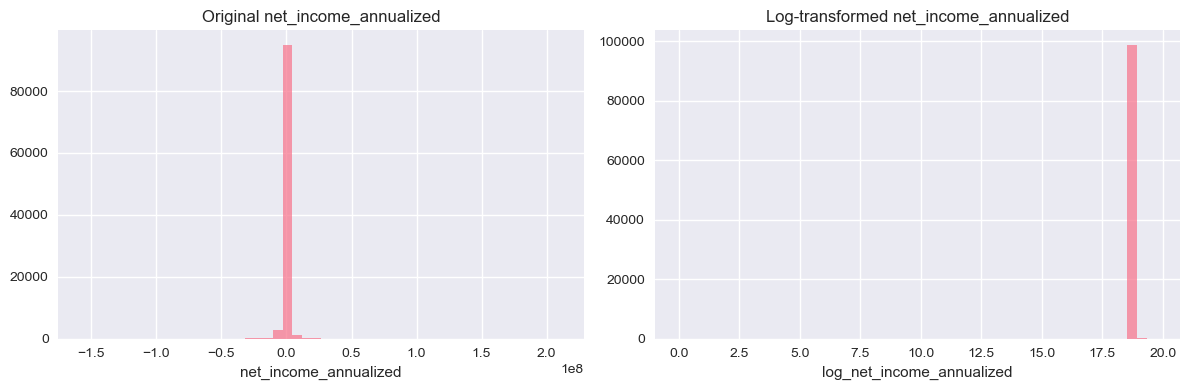


Analyzing less_total_operating_expense_annualized:
  Min value: 39974.00
  Max value: 256857577.39
  Negative values: 0
  Zero values: 0
  Original skewness: 9.444
  Log-transformed skewness: 0.209


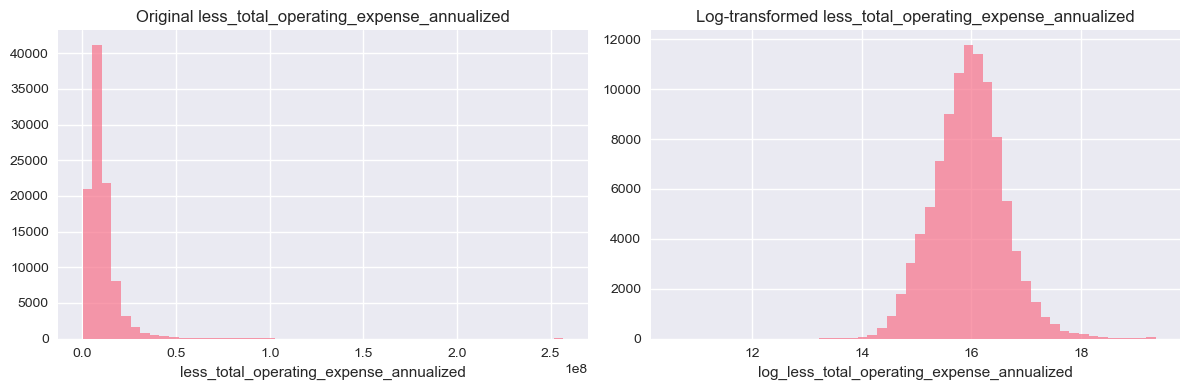


Analyzing total_bed_days_available_annualized:
  Min value: 48.00
  Max value: 8157103.23
  Negative values: 0
  Zero values: 0
  Original skewness: 119.519
  Log-transformed skewness: -0.449


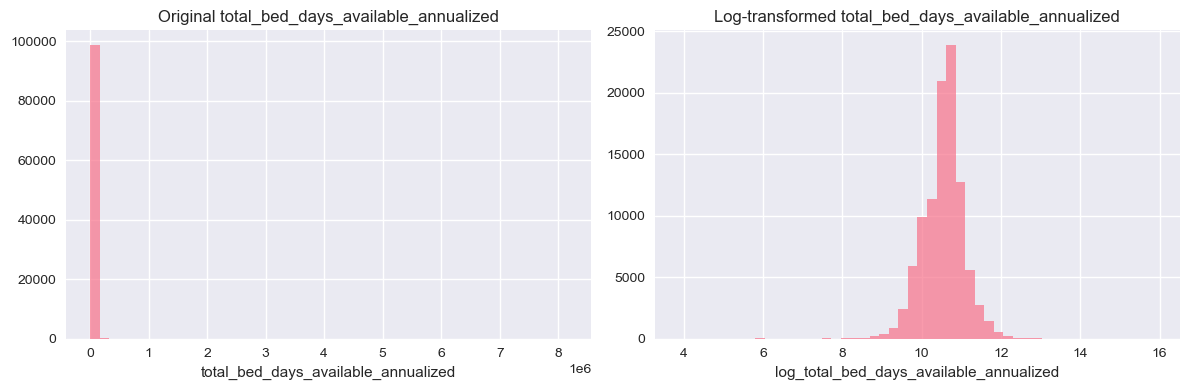


=== Step 2: Handling Missing Values ===
Missing value summary:
  bedcert: 270 (0.3%)
  restot: 744 (0.7%)
  overall_rating: 1657 (1.7%)
  tot_penlty_cnt: 270 (0.3%)
  rnhrd: 3028 (3.0%)
  totlichrd: 3028 (3.0%)
  tothrd: 3028 (3.0%)
  pthrd: 3035 (3.1%)
  inhosp: 270 (0.3%)
  rural_versus_urban: 20 (0.0%)
  gross_revenue: 177 (0.2%)
  net_income: 244 (0.2%)
  net_patient_revenue: 173 (0.2%)
  number_of_beds: 311 (0.3%)
  total_income: 201 (0.2%)
  total_salaries_adjusted: 1 (0.0%)
  less_total_operating_expense: 2 (0.0%)
  net_income_from_patients: 6 (0.0%)
  wage_related_costs_core: 537 (0.5%)
  less_discounts_on_patients: 6522 (6.6%)
  snf_admissions_total: 28393 (28.6%)
  total_days_total: 9 (0.0%)
  total_bed_days_available: 318 (0.3%)
  other_revenue: 177 (0.2%)
  total_costs: 1 (0.0%)
  sum_of_hd_code: 12627 (12.7%)
  count_of_hd_code: 12627 (12.7%)
  gross_revenue_annualized: 177 (0.2%)
  net_income_annualized: 244 (0.2%)
  net_patient_revenue_annualized: 173 (0.2%)
  total_cos

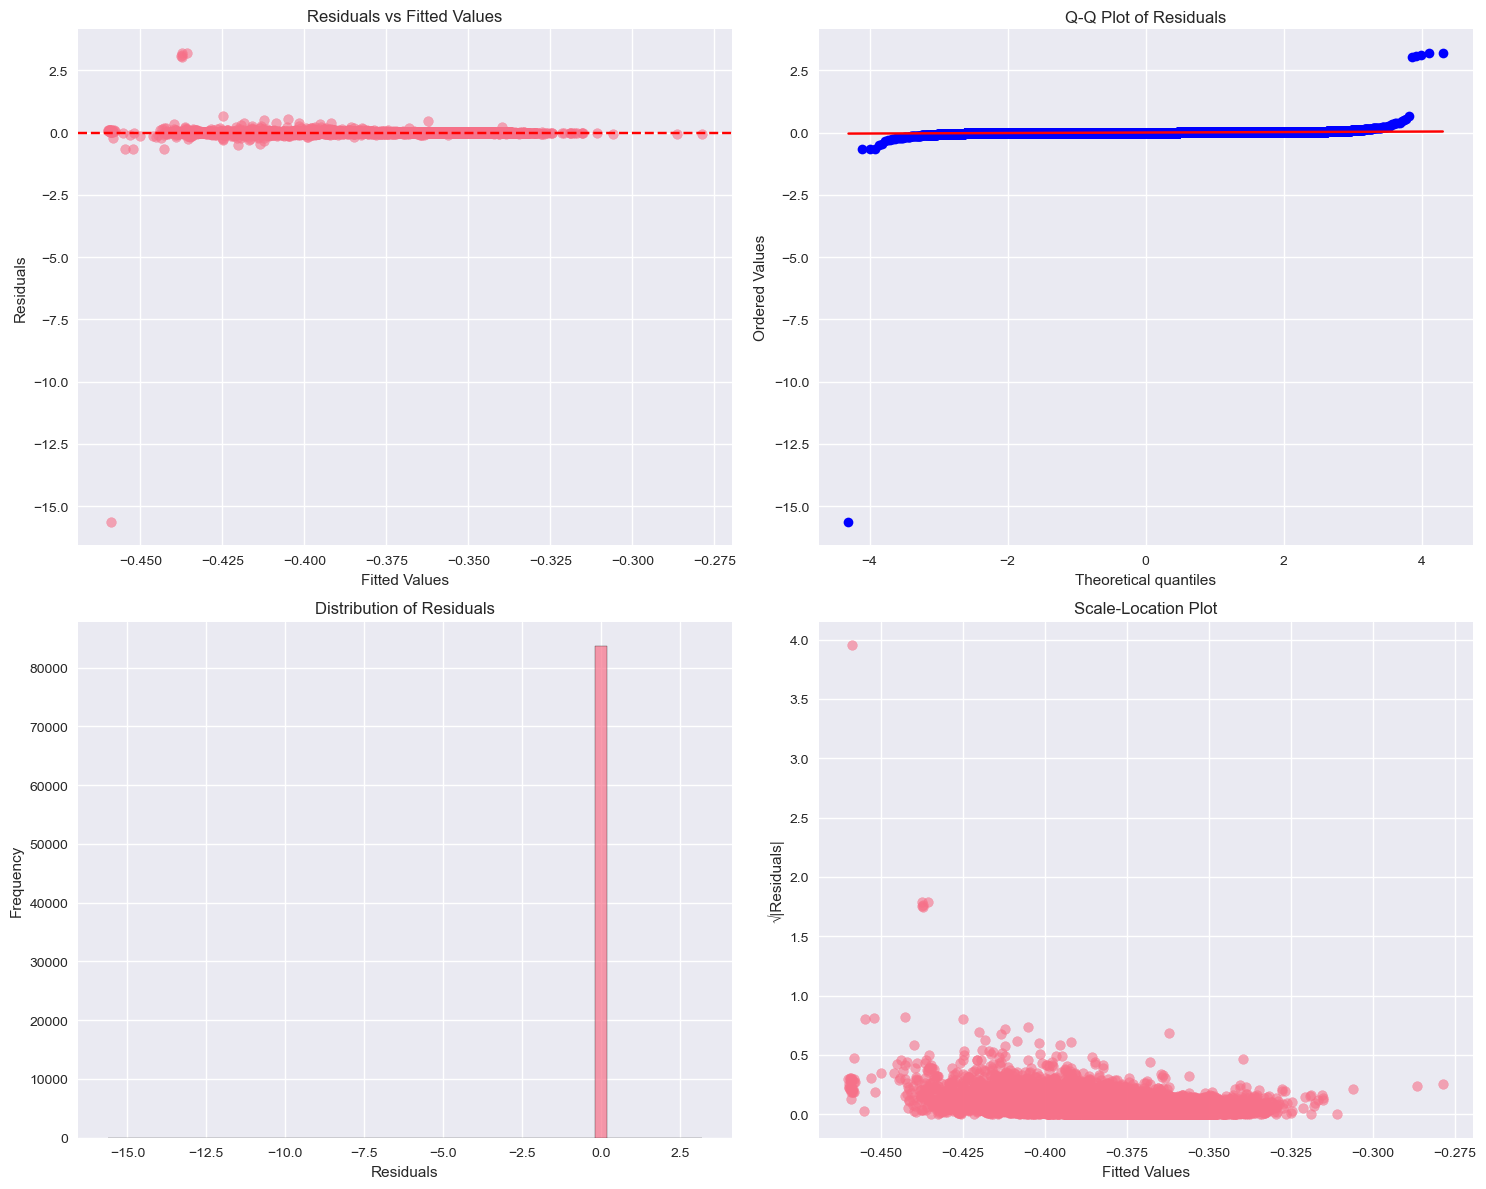


Diagnostic Test Results:
Jarque-Bera normality test: statistic=10056507692489.6855, p-value=0.0000
Residual mean: -0.000000
Residual std: 0.060461
Residual skewness: -197.9578
Residual kurtosis: 53709.4494

=== Step 8: Model Comparison ===
IMPROVED MODEL PERFORMANCE:
Within R-squared: 0.0021
Overall R-squared: -0.0403
F-statistic: 29.2723
F-statistic p-value: 0.000000
Number of observations: 83663
Number of entities: 14708.0

=== Sensitivity Analysis ===
1. Winsorizing extreme values...
Winsorized net_income_annualized: clipped 1984 observations
Winsorized less_total_operating_expense_annualized: clipped 1988 observations

2. Subgroup Analysis:
Rural vs Urban breakdown:
rural_versus_urban
U    72294
R    27036
Name: count, dtype: int64
Ownership type breakdown:
ownership
For profit - Corporation                  57498
Non profit - Corporation                  16049
For profit - Partnership                   6481
For profit - Individual                    4819
For profit - Limited Liab

In [23]:
# Initialize the analysis
analysis = ImprovedFixedEffectsAnalysis(nursing_df)

# Run complete analysis
results = analysis.run_complete_analysis(
    dependent_var='net_income_annualized',
    standardize=True
)

# Run sensitivity analysis
analysis.sensitivity_analysis()

# Access results
print("Final model results:")
print(analysis.results['improved_fe'].summary)